# Please note that re-loading the Kernel and Run All may impact the machine learnign models employed and results may not match the report

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2_contingency
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Data Exploration and Preparation

In [2]:
#reading the data frame and printing the first 5 rows
df_mus = pd.read_csv('Integrated _CA1_Mushrooms Datasource.csv')
df_mus.head()

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,...,silky,white,brown,universal,orange,0.9730964627139668,3/7/2021,3/2/2021,49,C
1,?,convex,brown,narrow,tapering,urban,edible,2,brown,several,...,scaly,pink,white,universal,white,?,3/5/2023,3/4/2023,13,F
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,...,?,gray,orange,partial,orange,1.9776191125191191,1/8/2022,1/4/2022,10,C
3,4,sunken,gray,narrow,tapering,?,poisonous,4,orange,scattered,...,scaly,gray,orange,universal,yellow,2.2727627620673605,2/10/2023,2/2/2023,22,C
4,5,flat,red,?,enlarging,urban,edible,7,brown,several,...,fibrous,orange,white,partial,white,0.7188737847331463,1/9/2023,1/4/2023,9,C


In [3]:
### basic of data exploration, info, describe, isnull

df_mus.describe()

,Temperature
count,1000.000000
mean,14.666000
std,8.698742
min,0.000000
25%,7.000000
50%,15.000000
75%,22.000000
max,49.000000


In [5]:
df_mus_treated = df_mus.copy()

# Replace '?' with NaN
df_mus_treated.replace({'\?': np.nan}, regex=True, inplace=True)
df_mus_treated

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,...,silky,white,brown,universal,orange,0.9730964627139668,3/7/2021,3/2/2021,49,C
1,NaN,convex,brown,narrow,tapering,urban,edible,2,brown,several,...,scaly,pink,white,universal,white,NaN,3/5/2023,3/4/2023,13,F
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,...,NaN,gray,orange,partial,orange,1.9776191125191191,1/8/2022,1/4/2022,10,C
3,4,sunken,gray,narrow,tapering,NaN,poisonous,4,orange,scattered,...,scaly,gray,orange,universal,yellow,2.2727627620673605,2/10/2023,2/2/2023,22,C
4,5,flat,red,NaN,enlarging,urban,edible,7,brown,several,...,fibrous,orange,white,partial,white,0.7188737847331463,1/9/2023,1/4/2023,9,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,...,smooth,white,orange,universal,white,3.755729472021494,1/7/2022,1/5/2022,25,C
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,...,fibrous,white,brown,partial,brown,NaN,5/11/2023,5/3/2023,4,C
997,998,conical,NaN,narrow,tapering,NaN,edible,10,brown,scattered,...,silky,gray,orange,partial,yellow,11.2583910697714988,3/7/2023,3/4/2023,19,C
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,...,NaN,pink,orange,universal,brown,4.964073966,3/2/2023,3/2/2023,20,C


/Users/diogomonteiro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


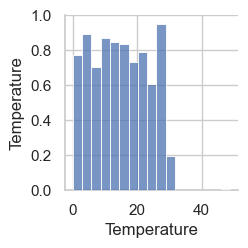

In [6]:
sns.pairplot(df_mus_treated)

In [7]:
df_mus_treated.count()

Mushroom ID                  878
Cap Shape                    884
Cap Color                    895
Gill Size                    907
Stalk Shape                  899
Habitat                      896
Edibility                    887
Market Demand                893
Spore Print Color            889
Population                   895
Odor                         893
Bruising                     900
Ring Type                    911
Stalk Surface Above Ring     901
Stalk Surface Below Ring     897
Stalk Color Above Ring       896
Stalk Color Below Ring       893
Veil Type                    906
Veil Color                   906
Growth Rate                  919
Inspection Date             1000
Incubation date             1000
Temperature                 1000
Measurement                 1000
dtype: int64

In [8]:
# Calculating the percentage of missing values for each column
missing_percentage = (df_mus_treated.isnull().mean() * 100).round(2)

# Creating a DataFrame to display the results
missing_info = pd.DataFrame({
    #'Column': df.columns,
    'Missing Percentage': missing_percentage
})

# Display the information
print(missing_info)

                          Missing Percentage
Mushroom ID                             12.2
Cap Shape                               11.6
Cap Color                               10.5
Gill Size                                9.3
Stalk Shape                             10.1
Habitat                                 10.4
Edibility                               11.3
Market Demand                           10.7
Spore Print Color                       11.1
Population                              10.5
Odor                                    10.7
Bruising                                10.0
Ring Type                                8.9
Stalk Surface Above Ring                 9.9
Stalk Surface Below Ring                10.3
Stalk Color Above Ring                  10.4
Stalk Color Below Ring                  10.7
Veil Type                                9.4
Veil Color                               9.4
Growth Rate                              8.1
Inspection Date                          0.0
Incubation

In [9]:
df_mus_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mushroom ID               878 non-null    object
 1   Cap Shape                 884 non-null    object
 2   Cap Color                 895 non-null    object
 3   Gill Size                 907 non-null    object
 4   Stalk Shape               899 non-null    object
 5   Habitat                   896 non-null    object
 6   Edibility                 887 non-null    object
 7   Market Demand             893 non-null    object
 8   Spore Print Color         889 non-null    object
 9   Population                895 non-null    object
 10  Odor                      893 non-null    object
 11  Bruising                  900 non-null    object
 12  Ring Type                 911 non-null    object
 13  Stalk Surface Above Ring  901 non-null    object
 14  Stalk Surface Below Ring 

### Identifying possible outliers

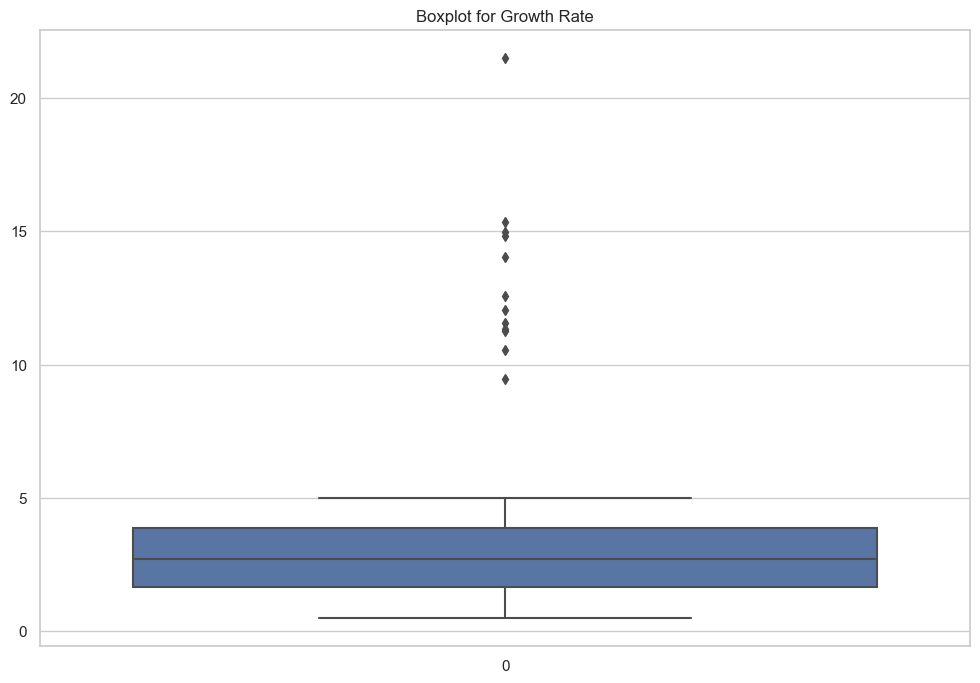

In [10]:
# Creating boxplots for Growth Rate

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_mus_treated['Growth Rate'])
plt.title('Boxplot for Growth Rate')
plt.show()


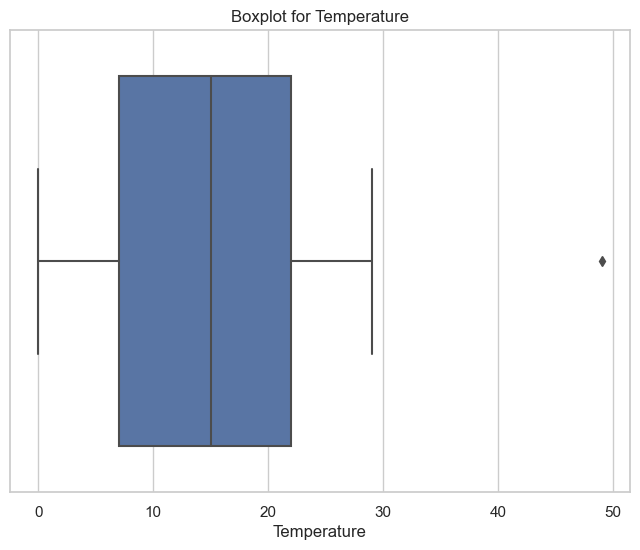

In [11]:
# Creating a boxplot for the 'Temperature'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_mus_treated['Temperature'])
plt.title('Boxplot for Temperature')
plt.show()



### Treating the dataset

In [12]:
# Converting the column Mushroom ID to float, including non-convertible values
df_mus_treated['Mushroom ID'] = pd.to_numeric(df_mus_treated['Mushroom ID'], errors='coerce')

# Replacing NaN with sequential values based on the previous row + 1
df_mus_treated['Mushroom ID'].fillna(df_mus_treated['Mushroom ID'].shift() + 1, inplace=True)
df_mus_treated

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,1.0,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,...,silky,white,brown,universal,orange,0.9730964627139668,3/7/2021,3/2/2021,49,C
1,2.0,convex,brown,narrow,tapering,urban,edible,2,brown,several,...,scaly,pink,white,universal,white,NaN,3/5/2023,3/4/2023,13,F
2,3.0,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,...,NaN,gray,orange,partial,orange,1.9776191125191191,1/8/2022,1/4/2022,10,C
3,4.0,sunken,gray,narrow,tapering,NaN,poisonous,4,orange,scattered,...,scaly,gray,orange,universal,yellow,2.2727627620673605,2/10/2023,2/2/2023,22,C
4,5.0,flat,red,NaN,enlarging,urban,edible,7,brown,several,...,fibrous,orange,white,partial,white,0.7188737847331463,1/9/2023,1/4/2023,9,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,...,smooth,white,orange,universal,white,3.755729472021494,1/7/2022,1/5/2022,25,C
996,997.0,conical,brown,broad,tapering,woods,edible,1,orange,numerous,...,fibrous,white,brown,partial,brown,NaN,5/11/2023,5/3/2023,4,C
997,998.0,conical,NaN,narrow,tapering,NaN,edible,10,brown,scattered,...,silky,gray,orange,partial,yellow,11.2583910697714988,3/7/2023,3/4/2023,19,C
998,999.0,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,...,NaN,pink,orange,universal,brown,4.964073966,3/2/2023,3/2/2023,20,C


In [13]:
# checking for missing values

df_mus_treated[df_mus_treated['Mushroom ID'].isna()]

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
46,NaN,conical,white,broad,enlarging,urban,poisonous,7,orange,abundant,...,silky,pink,pink,partial,NaN,4.833548413175843,5/2/2023,5/1/2023,19,C
144,NaN,conical,brown,narrow,enlarging,leaves,poisonous,8,white,NaN,...,NaN,white,orange,partial,brown,4.064947893885403,3/4/2023,3/4/2023,25,C
284,NaN,conical,brown,broad,tapering,woods,poisonous,6,brown,abundant,...,NaN,white,brown,universal,white,3.018469083746352,2/10/2023,2/1/2023,6,C
329,NaN,flat,red,narrow,enlarging,woods,edible,2,orange,numerous,...,fibrous,brown,white,partial,NaN,1.6739205089466496,4/5/2023,4/5/2023,20,C
378,NaN,sunken,gray,narrow,tapering,grasses,edible,4,black,solitary,...,scaly,white,orange,partial,white,NaN,2/9/2023,2/4/2023,10,C
481,NaN,convex,NaN,NaN,tapering,paths,poisonous,NaN,black,numerous,...,smooth,pink,pink,partial,brown,0.9181204740111127,5/7/2023,5/3/2023,13,C
545,NaN,convex,white,narrow,enlarging,NaN,poisonous,NaN,brown,scattered,...,NaN,pink,gray,partial,orange,2.9925635494843434,5/3/2023,5/1/2023,28,C
578,NaN,flat,gray,NaN,enlarging,woods,edible,2,yellow,solitary,...,fibrous,pink,orange,universal,yellow,2.6792135510314123,4/9/2023,4/2/2023,28,C
668,NaN,bell,gray,broad,tapering,urban,edible,8,black,scattered,...,silky,orange,orange,universal,yellow,4.738520153993776,5/8/2026,5/1/2026,28,C
725,NaN,conical,white,narrow,enlarging,paths,NaN,2,yellow,solitary,...,scaly,orange,gray,universal,white,1.1277942235925733,1/11/2023,1/3/2023,0,C


In [14]:
# Replacing NaN with a default value (e.g., 0) in the Mushroom ID column
df_mus_treated['Mushroom ID'].fillna(0, inplace=True)

df_mus_treated[df_mus_treated['Mushroom ID'] == 0]

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
46,0.0,conical,white,broad,enlarging,urban,poisonous,7,orange,abundant,...,silky,pink,pink,partial,NaN,4.833548413175843,5/2/2023,5/1/2023,19,C
144,0.0,conical,brown,narrow,enlarging,leaves,poisonous,8,white,NaN,...,NaN,white,orange,partial,brown,4.064947893885403,3/4/2023,3/4/2023,25,C
284,0.0,conical,brown,broad,tapering,woods,poisonous,6,brown,abundant,...,NaN,white,brown,universal,white,3.018469083746352,2/10/2023,2/1/2023,6,C
329,0.0,flat,red,narrow,enlarging,woods,edible,2,orange,numerous,...,fibrous,brown,white,partial,NaN,1.6739205089466496,4/5/2023,4/5/2023,20,C
378,0.0,sunken,gray,narrow,tapering,grasses,edible,4,black,solitary,...,scaly,white,orange,partial,white,NaN,2/9/2023,2/4/2023,10,C
481,0.0,convex,NaN,NaN,tapering,paths,poisonous,NaN,black,numerous,...,smooth,pink,pink,partial,brown,0.9181204740111127,5/7/2023,5/3/2023,13,C
545,0.0,convex,white,narrow,enlarging,NaN,poisonous,NaN,brown,scattered,...,NaN,pink,gray,partial,orange,2.9925635494843434,5/3/2023,5/1/2023,28,C
578,0.0,flat,gray,NaN,enlarging,woods,edible,2,yellow,solitary,...,fibrous,pink,orange,universal,yellow,2.6792135510314123,4/9/2023,4/2/2023,28,C
668,0.0,bell,gray,broad,tapering,urban,edible,8,black,scattered,...,silky,orange,orange,universal,yellow,4.738520153993776,5/8/2026,5/1/2026,28,C
725,0.0,conical,white,narrow,enlarging,paths,NaN,2,yellow,solitary,...,scaly,orange,gray,universal,white,1.1277942235925733,1/11/2023,1/3/2023,0,C


In [15]:
column_name = 'Mushroom ID'

# Identifying the positions where the value is 0

zero_positions = df_mus_treated[column_name] == 0


# Calculating the cumulative sum of the boolean mask to get unique indices for replacement

replacement_values = zero_positions.cumsum()


# Replacing 0 values with previous row number + 1

df_mus_treated[column_name] = df_mus_treated[column_name].where(~zero_positions, replacement_values)


df_mus_treated


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,1.0,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,...,silky,white,brown,universal,orange,0.9730964627139668,3/7/2021,3/2/2021,49,C
1,2.0,convex,brown,narrow,tapering,urban,edible,2,brown,several,...,scaly,pink,white,universal,white,NaN,3/5/2023,3/4/2023,13,F
2,3.0,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,...,NaN,gray,orange,partial,orange,1.9776191125191191,1/8/2022,1/4/2022,10,C
3,4.0,sunken,gray,narrow,tapering,NaN,poisonous,4,orange,scattered,...,scaly,gray,orange,universal,yellow,2.2727627620673605,2/10/2023,2/2/2023,22,C
4,5.0,flat,red,NaN,enlarging,urban,edible,7,brown,several,...,fibrous,orange,white,partial,white,0.7188737847331463,1/9/2023,1/4/2023,9,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,...,smooth,white,orange,universal,white,3.755729472021494,1/7/2022,1/5/2022,25,C
996,997.0,conical,brown,broad,tapering,woods,edible,1,orange,numerous,...,fibrous,white,brown,partial,brown,NaN,5/11/2023,5/3/2023,4,C
997,998.0,conical,NaN,narrow,tapering,NaN,edible,10,brown,scattered,...,silky,gray,orange,partial,yellow,11.2583910697714988,3/7/2023,3/4/2023,19,C
998,999.0,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,...,NaN,pink,orange,universal,brown,4.964073966,3/2/2023,3/2/2023,20,C


In [16]:
# Making sure there's no missing values in the column Mushroom ID

df_mus_treated[df_mus_treated['Mushroom ID']==0]


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement


In [17]:
# Converting the 'Mushroom ID' column to integer type

df_mus_treated['Mushroom ID'] = df_mus_treated['Mushroom ID'].astype(int)
df_mus_treated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mushroom ID               1000 non-null   int64 
 1   Cap Shape                 884 non-null    object
 2   Cap Color                 895 non-null    object
 3   Gill Size                 907 non-null    object
 4   Stalk Shape               899 non-null    object
 5   Habitat                   896 non-null    object
 6   Edibility                 887 non-null    object
 7   Market Demand             893 non-null    object
 8   Spore Print Color         889 non-null    object
 9   Population                895 non-null    object
 10  Odor                      893 non-null    object
 11  Bruising                  900 non-null    object
 12  Ring Type                 911 non-null    object
 13  Stalk Surface Above Ring  901 non-null    object
 14  Stalk Surface Below Ring 

In [18]:
# allowing Jupyter to show all columns

pd.set_option('display.max_columns', None)
df_mus_treated


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.9730964627139668,3/7/2021,3/2/2021,49,C
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,NaN,3/5/2023,3/4/2023,13,F
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,NaN,none,silky,NaN,gray,orange,partial,orange,1.9776191125191191,1/8/2022,1/4/2022,10,C
3,4,sunken,gray,narrow,tapering,NaN,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.2727627620673605,2/10/2023,2/2/2023,22,C
4,5,flat,red,NaN,enlarging,urban,edible,7,brown,several,almond,NaN,none,fibrous,fibrous,orange,white,partial,white,0.7188737847331463,1/9/2023,1/4/2023,9,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,NaN,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729472021494,1/7/2022,1/5/2022,25,C
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,NaN,5/11/2023,5/3/2023,4,C
997,998,conical,NaN,narrow,tapering,NaN,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.2583910697714988,3/7/2023,3/4/2023,19,C
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,NaN,pink,orange,universal,brown,4.964073966,3/2/2023,3/2/2023,20,C


In [19]:
# converting Growth Rate to float and dates columns to timeseries

df_mus_treated['Growth Rate'] = pd.to_numeric(df_mus_treated['Growth Rate'], errors='coerce')  # Convert 'Growth Rate' to float

df_mus_treated['Inspection Date'] = pd.to_datetime(df_mus_treated['Inspection Date'], errors='coerce')  # Convert 'Inspection Date' to datetime
df_mus_treated['Incubation date'] = pd.to_datetime(df_mus_treated['Incubation date'], errors='coerce')  # Convert 'Incubation Date' to datetime

# making sure the columns were converted to the desired format
df_mus_treated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mushroom ID               1000 non-null   int64         
 1   Cap Shape                 884 non-null    object        
 2   Cap Color                 895 non-null    object        
 3   Gill Size                 907 non-null    object        
 4   Stalk Shape               899 non-null    object        
 5   Habitat                   896 non-null    object        
 6   Edibility                 887 non-null    object        
 7   Market Demand             893 non-null    object        
 8   Spore Print Color         889 non-null    object        
 9   Population                895 non-null    object        
 10  Odor                      893 non-null    object        
 11  Bruising                  900 non-null    object        
 12  Ring Type            

In [20]:
#based on the table below.. is it correct to apply an imputation method based on the most frequent category? 
#What do you think it would be the best aproach?

df_mus_treated.groupby('Edibility')['Market Demand'].describe()


,count,unique,top,freq
Edibility,,,,
edible,400,10,3,46
poisonous,394,10,3,52


In [21]:
## Imputation - Hot Deck - Hardcode 
df_mus_tr = df_mus_treated.copy()

# this codeline, a new column 'Edibility_Tr' is created in df_mus_tr, and missing 
# values in the original 'Edibility' column are filled with the hardcoded 
# value 'NotDefined'. This creates a new column where missing values 
# in 'Edibility' are replaced with 'NotDefined'.
df_mus_tr['Edibility_Tr'] = df_mus_tr['Edibility'].fillna('NotDefined')

# This codeline groups the DataFrame df_mus_tr by the newly created 
# column 'Edibility_Tr' and calculates the count of the 'Market Demand'
# column within each group. It provides a summary of the total fare for 
# each group defined by the imputed 'Edibility_Tr' values.
df_mus_tr.groupby('Edibility_Tr')['Market Demand'].count()


Edibility_Tr
NotDefined     99
edible        400
poisonous     394
Name: Market Demand, dtype: int64

In [133]:
# making sure the Edibility_Tr column has indeed no missing values

df_mus_tr['Edibility_Tr'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Edibility_Tr
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [30]:
# checking unique values for odours

df = df_mus_treated.copy()

unique_odors = df['Odor'].unique()
print(unique_odors)

['musty' 'foul' 'creosote' 'almond' 'anise' nan]


In [31]:
odor_counts = df['Odor'].value_counts()

# Calculate relative frequency
relative_frequency = odor_counts / len(df)

# Display the results
odor_relative_frequency = pd.DataFrame({
    'Odor': odor_counts.index,
    'Count': odor_counts.values,
    'Relative Frequency': relative_frequency.values
})

print(odor_relative_frequency)

       Odor  Count  Relative Frequency
0    almond    195               0.195
1      foul    185               0.185
2     anise    184               0.184
3  creosote    165               0.165
4     musty    164               0.164


### Applying RandomForestClassifier ML to predict missing values

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Identify relevant features for prediction
features = ['Cap Shape', 'Cap Color', 'Gill Size', 'Stalk Shape', 'Habitat', 'Market Demand', 'Spore Print Color', 'Population', 'Bruising', 'Ring Type']

# Split the data into training and test sets
train_data = df.dropna(subset=['Odor'])
test_data = df[df['Odor'].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data['Odor']
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df['Odor'].isnull(), 'Odor'] = predicted_odors


In [33]:
# Doing the same for the Cap Shape column


# Identify relevant features for prediction
features = ['Odor', 'Cap Color', 'Gill Size', 'Stalk Shape', 'Habitat', 'Market Demand', 'Spore Print Color', 'Population', 'Bruising', 'Ring Type']

# Split the data into training and test sets
train_data = df.dropna(subset=['Cap Shape'])
test_data = df[df['Cap Shape'].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data['Cap Shape']
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df['Cap Shape'].isnull(), 'Cap Shape'] = predicted_odors


In [34]:
# Doing the same for the Cap Color column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Gill Size', 'Stalk Shape', 'Habitat', 'Market Demand', 'Spore Print Color', 'Population', 'Bruising', 'Ring Type']

# Split the data into training and test sets
train_data = df.dropna(subset=['Cap Color'])
test_data = df[df['Cap Color'].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data['Cap Color']
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df['Cap Color'].isnull(), 'Cap Color'] = predicted_odors


In [35]:
# Doing the same for the Gill Size column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Stalk Shape', 'Habitat', 'Market Demand', 'Spore Print Color', 'Population', 'Bruising', 'Ring Type']
column = 'Gill Size'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [36]:
# Doing the same for the Stalk Shape column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size', 'Habitat', 'Market Demand', 'Spore Print Color', 'Population', 'Bruising', 'Ring Type']
column = 'Stalk Shape'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [37]:
# Doing the same for the Habitat column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Market Demand', 'Spore Print Color', 'Population',
            'Bruising', 'Ring Type']
column = 'Habitat'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [38]:
# Doing the same for the Market Demand column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Spore Print Color', 'Population',
            'Bruising', 'Ring Type']
column = 'Market Demand'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [39]:
# Doing the same for the Spore Print Color column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Market Demand', 'Population',
            'Bruising', 'Ring Type','Stalk Surface Above Ring',
           'Stalk Surface Below Ring','Stalk Color Above Ring',
           'Stalk Color Below Ring','Veil Type','Veil Color']
column = 'Spore Print Color'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [40]:
# Doing the same for the Edibility column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Market Demand','Spore Print Color', 'Population',
            'Bruising', 'Ring Type','Stalk Surface Above Ring',
           'Stalk Surface Below Ring','Stalk Color Above Ring',
           'Stalk Color Below Ring','Veil Type','Veil Color']
column = 'Edibility'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [41]:
# Doing the same for the Population column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Edibility', 'Market Demand','Spore Print Color',
            'Bruising', 'Ring Type',
            'Stalk Surface Above Ring','Stalk Surface Below Ring',
            'Stalk Color Above Ring','Stalk Color Below Ring',
            'Veil Type','Veil Color']
column = 'Population'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [42]:
# Doing the same for the Bruising column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Edibility', 'Market Demand','Spore Print Color',
            'Population', 'Ring Type',
            'Stalk Surface Above Ring','Stalk Surface Below Ring',
            'Stalk Color Above Ring','Stalk Color Below Ring',
            'Veil Type','Veil Color']
column = 'Bruising'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [43]:
# Doing the same for the Ring Type column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Edibility', 'Market Demand','Spore Print Color',
            'Population', 'Bruising',
            'Stalk Surface Above Ring','Stalk Surface Below Ring',
            'Stalk Color Above Ring','Stalk Color Below Ring',
            'Veil Type','Veil Color']
column = 'Ring Type'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [44]:
# Doing the same for the Stalk Surface Above Ring column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Edibility', 'Market Demand','Spore Print Color',
            'Population', 'Bruising','Ring Type',
            'Stalk Surface Below Ring',
            'Stalk Color Above Ring','Stalk Color Below Ring',
            'Veil Type','Veil Color']
column = 'Stalk Surface Above Ring'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [45]:
# Doing the same for the Stalk Surface Below Ring column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Edibility', 'Market Demand','Spore Print Color',
            'Population', 'Bruising','Ring Type',
            'Stalk Surface Above Ring',
            'Stalk Color Above Ring','Stalk Color Below Ring',
            'Veil Type','Veil Color']
column = 'Stalk Surface Below Ring'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [46]:
# Doing the same for the Stalk Color Above Ring column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Edibility', 'Market Demand','Spore Print Color',
            'Population', 'Bruising','Ring Type',
            'Stalk Surface Above Ring','Stalk Surface Below Ring',
            'Stalk Color Below Ring',
            'Veil Type','Veil Color']
column = 'Stalk Color Above Ring'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [47]:
# Doing the same for the Stalk Color Below Ring column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Edibility', 'Market Demand','Spore Print Color',
            'Population', 'Bruising','Ring Type',
            'Stalk Surface Above Ring','Stalk Surface Below Ring',
            'Stalk Color Above Ring',
            'Veil Type','Veil Color']
column = 'Stalk Color Below Ring'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [48]:
# Doing the same for the Veil Type column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Edibility', 'Market Demand','Spore Print Color',
            'Population', 'Bruising','Ring Type',
            'Stalk Surface Above Ring','Stalk Surface Below Ring',
            'Stalk Color Above Ring',
            'Stalk Color Below Ring','Veil Color']
column = 'Veil Type'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


In [49]:
# Doing the same for the Veil Color column


# Identify relevant features for prediction
features = ['Odor','Cap Shape', 'Cap Color', 'Gill Size','Stalk Shape',
            'Habitat', 'Edibility', 'Market Demand','Spore Print Color',
            'Population', 'Bruising','Ring Type',
            'Stalk Surface Above Ring','Stalk Surface Below Ring',
            'Stalk Color Above Ring',
            'Stalk Color Below Ring','Veil Type']
column = 'Veil Color'
# Split the data into training and test sets
train_data = df.dropna(subset=[column])
test_data = df[df[column].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data[column]
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose a model (Random Forest classifier in this example)
model = RandomForestClassifier()

# Create and fit the final pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train)

# Predict missing values
predicted_odors = clf.predict(X_test)

# Impute missing values in the original DataFrame
df.loc[df[column].isnull(), column] = predicted_odors


### Imputing growth rate with SimpleImputer

In [50]:
# Identifying numerical columns to impute
numerical_columns_to_impute = ['Growth Rate'] 

# Create a SimpleImputer for numerical columns (impute missing values with the mean)
numerical_imputer = SimpleImputer(strategy='mean')

# Impute missing values in the specified numerical columns
df[numerical_columns_to_impute] = numerical_imputer.fit_transform(df[numerical_columns_to_impute])

In [51]:
# Convert 'Market Demand' column to integer type
df['Market Demand'] = pd.to_numeric(df['Market Demand'], errors='coerce').astype('Int64')


In [53]:
# Calculatint the relative frequency for Odor

odor_counts = df['Odor'].value_counts()

relative_frequency = odor_counts / len(df)

# Display the results
odor_relative_frequency = pd.DataFrame({
    'Odor': odor_counts.index,
    'Count': odor_counts.values,
    'Relative Frequency': relative_frequency.values
})

print(odor_relative_frequency)

       Odor  Count  Relative Frequency
0    almond    222               0.222
1      foul    211               0.211
2     anise    209               0.209
3     musty    180               0.180
4  creosote    178               0.178


### Binning

In [55]:
df_temp = df['Temperature']
df_temp

print(f'Min Temp: {df_temp.min()}')
print(f'Max Temp: {df_temp.max()}')
print(f'Mean Temp: {df_temp.mean()}')

Min Temp: 0
Max Temp: 49
Mean Temp: 14.666


In [56]:
# mushrooms optimal temperature between 13 and 28

# Defining the bins

bins = [-1, 13, 28, 100]  
labels = ['Low', 'Optimal', 'High']  # Define labels for each bin


# Creating the new column Temperature_Category

df['Temperature_Category'] = pd.cut(df['Temperature'], bins=bins, labels=labels)
df


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.973096,2021-03-07,2021-03-02,49,C,High
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,F,Low
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,No,none,silky,smooth,gray,orange,partial,orange,1.977619,2022-01-08,2022-01-04,10,C,Low
3,4,sunken,gray,narrow,tapering,grasses,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.272763,2023-02-10,2023-02-02,22,C,Optimal
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,almond,Yes,none,fibrous,fibrous,orange,white,partial,white,0.718874,2023-01-09,2023-01-04,9,C,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,anise,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729,2022-01-07,2022-01-05,25,C,Optimal
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,2.876123,2023-05-11,2023-05-03,4,C,Low
997,998,conical,brown,narrow,tapering,urban,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.258391,2023-03-07,2023-03-04,19,C,Optimal
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,scaly,pink,orange,universal,brown,4.964074,2023-03-02,2023-03-02,20,C,Optimal


### Standardization

In [57]:
from sklearn.preprocessing import StandardScaler

# Standardize Growth Rate and Temperature
num_columns = ['Growth Rate', 'Temperature']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns, adding new columns with "_standardized" suffix
df[[f"{col}_standardized" for col in num_columns]] = scaler.fit_transform(df[num_columns])
df


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category,Growth Rate_standardized,Temperature_standardized
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.973096,2021-03-07,2021-03-02,49,C,High,-1.115478,3.948983
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,F,Low,0.000000,-0.191618
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,No,none,silky,smooth,gray,orange,partial,orange,1.977619,2022-01-08,2022-01-04,10,C,Low,-0.526667,-0.536668
3,4,sunken,gray,narrow,tapering,grasses,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.272763,2023-02-10,2023-02-02,22,C,Optimal,-0.353666,0.843532
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,almond,Yes,none,fibrous,fibrous,orange,white,partial,white,0.718874,2023-01-09,2023-01-04,9,C,Low,-1.264494,-0.651684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,anise,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729,2022-01-07,2022-01-05,25,C,Optimal,0.515591,1.188582
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,2.876123,2023-05-11,2023-05-03,4,C,Low,0.000000,-1.226768
997,998,conical,brown,narrow,tapering,urban,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.258391,2023-03-07,2023-03-04,19,C,Optimal,4.913353,0.498482
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,scaly,pink,orange,universal,brown,4.964074,2023-03-02,2023-03-02,20,C,Optimal,1.223874,0.613499


### Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encoding 'Market Demand' and create a new column with a label
df['Encoded_Market Demand'] = label_encoder.fit_transform(df['Market Demand'])

# Encoding 'Odor' and create a new column with a label
df['Encoded_Odor'] = label_encoder.fit_transform(df['Odor'])

# Encoding 'Edibility' and create a new column with a label
df['Encoded_Edibility'] = label_encoder.fit_transform(df['Edibility'])

df

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.973096,2021-03-07,2021-03-02,49,C,High,-1.115478,3.948983,0,4,0
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,F,Low,0.000000,-0.191618,1,3,0
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,No,none,silky,smooth,gray,orange,partial,orange,1.977619,2022-01-08,2022-01-04,10,C,Low,-0.526667,-0.536668,7,4,0
3,4,sunken,gray,narrow,tapering,grasses,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.272763,2023-02-10,2023-02-02,22,C,Optimal,-0.353666,0.843532,3,2,1
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,almond,Yes,none,fibrous,fibrous,orange,white,partial,white,0.718874,2023-01-09,2023-01-04,9,C,Low,-1.264494,-0.651684,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,anise,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729,2022-01-07,2022-01-05,25,C,Optimal,0.515591,1.188582,3,1,1
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,2.876123,2023-05-11,2023-05-03,4,C,Low,0.000000,-1.226768,0,4,0
997,998,conical,brown,narrow,tapering,urban,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.258391,2023-03-07,2023-03-04,19,C,Optimal,4.913353,0.498482,9,3,0
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,scaly,pink,orange,universal,brown,4.964074,2023-03-02,2023-03-02,20,C,Optimal,1.223874,0.613499,5,0,0


### Selecting Market Demand, Edibility and Odor for analysis


## Descriptive Statistics (Edibility, Market Demand and Odor)

In [60]:
df.describe(include='all')

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility
count,1000.000000,1000,1000,1000,1000,1000,1000,1000.0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
unique,NaN,5,5,2,2,5,2,<NA>,5,5,5,2,4,4,4,5,5,2,4,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,conical,gray,narrow,enlarging,urban,edible,<NA>,brown,numerous,almond,Yes,none,silky,silky,pink,gray,partial,white,NaN,NaN,NaN,NaN,C,Optimal,NaN,NaN,NaN,NaN,NaN
freq,NaN,226,223,525,557,233,517,<NA>,245,225,222,519,281,265,257,215,232,501,282,NaN,NaN,NaN,NaN,967,508,NaN,NaN,NaN,NaN,NaN
mean,493.768000,NaN,NaN,NaN,NaN,NaN,NaN,5.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.876123,2022-12-28 01:06:14.399999744,2022-12-23 14:25:26.400000,14.666000,NaN,NaN,1.438849e-16,-3.907985e-17,4.347000,1.918000,0.483000
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502267,2020-01-06 00:00:00,2020-01-01 00:00:00,0.000000,NaN,NaN,-1.391460e+00,-1.686835e+00,0.000000,0.000000,0.000000
25%,239.750000,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.773095,2023-01-09 00:00:00,2023-01-04 00:00:00,7.000000,NaN,NaN,-6.465509e-01,-8.817178e-01,2.000000,1.000000,0.000000
50%,493.500000,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.876123,2023-03-04 00:00:00,2023-03-01 00:00:00,15.000000,NaN,NaN,0.000000e+00,3.841557e-02,4.000000,2.000000,0.000000
75%,747.250000,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.746824,2023-04-09 06:00:00,2023-04-04 00:00:00,22.000000,NaN,NaN,5.103705e-01,8.435323e-01,7.000000,3.000000,1.000000
max,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.511763,2031-03-12 00:00:00,2031-03-04 00:00:00,49.000000,NaN,NaN,1.092347e+01,3.948983e+00,9.000000,4.000000,1.000000


In [62]:
# Edibility
edibility_relative_frequencies = df['Edibility'].value_counts(normalize=True)

# Displaying the results
print("Edibility Relative Frequencies:")
print(edibility_relative_frequencies)
      

Edibility Relative Frequencies:
Edibility
edible       0.517
poisonous    0.483
Name: proportion, dtype: float64


In [63]:
# Odor
odor_relative_frequencies = df['Odor'].value_counts(normalize=True)

# Displaying the results
print("\nOdor Relative Frequencies:")
print(odor_relative_frequencies)



Odor Relative Frequencies:
Odor
almond      0.222
foul        0.211
anise       0.209
musty       0.180
creosote    0.178
Name: proportion, dtype: float64


In [64]:
# Market Demand

market_demand_relative_frequencies = df['Market Demand'].value_counts(normalize=True)

# Displaying the results
print("Relative Frequencies:")
print(market_demand_relative_frequencies)


Relative Frequencies:
Market Demand
3     0.131
6     0.109
2     0.103
4     0.103
7     0.103
10    0.098
1     0.096
8     0.092
5     0.084
9     0.081
Name: proportion, dtype: Float64


In [65]:
# Market Demand
market_demand_relative_frequencies = df['Market Demand'].value_counts(normalize=True)

# Edibility per Market Demand
edibility_per_demand = df.groupby(['Market Demand', 'Edibility']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Displaying the results
print("Relative Frequencies - Market Demand:")
print(market_demand_relative_frequencies)

print("\nRelative Frequencies - Edibility per Market Demand:")
print(edibility_per_demand)

Relative Frequencies - Market Demand:
Market Demand
3     0.131
6     0.109
2     0.103
4     0.103
7     0.103
10    0.098
1     0.096
8     0.092
5     0.084
9     0.081
Name: proportion, dtype: Float64

Relative Frequencies - Edibility per Market Demand:
Edibility        edible  poisonous
Market Demand                     
1              0.541667   0.458333
2              0.543689   0.456311
3              0.488550   0.511450
4              0.524272   0.475728
5              0.559524   0.440476
6              0.532110   0.467890
7              0.504854   0.495146
8              0.445652   0.554348
9              0.604938   0.395062
10             0.448980   0.551020


# Edibility Analysis

### Comparing "odor' and 'Edibility" columns

In [66]:
unique_edibility_list = df['Edibility'].unique().tolist()
unique_edibility_list

['edible', 'poisonous']

In [67]:
unique_odor_list = df['Odor'].unique().tolist()
unique_odor_list

['musty', 'foul', 'creosote', 'almond', 'anise']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'almond'),
  Text(1, 0, 'anise'),
  Text(2, 0, 'creosote'),
  Text(3, 0, 'foul'),
  Text(4, 0, 'musty')])

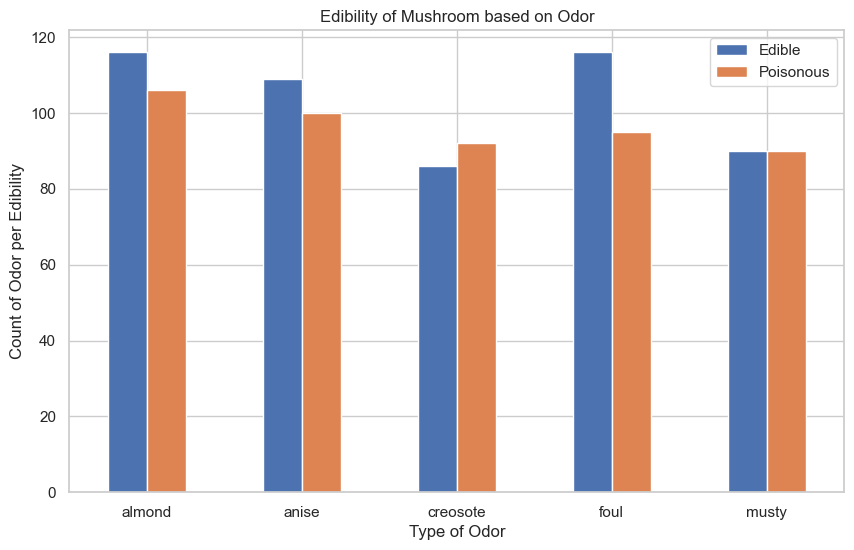

In [68]:
# comparing "odor' and 'Edibility" columns

pd.crosstab(df['Odor'], df['Edibility']).plot(kind='bar',figsize=(10, 6))

plt.title('Edibility of Mushroom based on Odor')
plt.xlabel('Type of Odor')
plt.ylabel('Count of Odor per Edibility')
plt.legend(labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)
                                


### Comparing Habitat with Edibility columns

In [69]:
unique_habitat_list = df['Habitat'].unique().tolist()
unique_habitat_list

['leaves', 'urban', 'grasses', 'woods', 'paths']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'grasses'),
  Text(1, 0, 'leaves'),
  Text(2, 0, 'paths'),
  Text(3, 0, 'urban'),
  Text(4, 0, 'woods')])

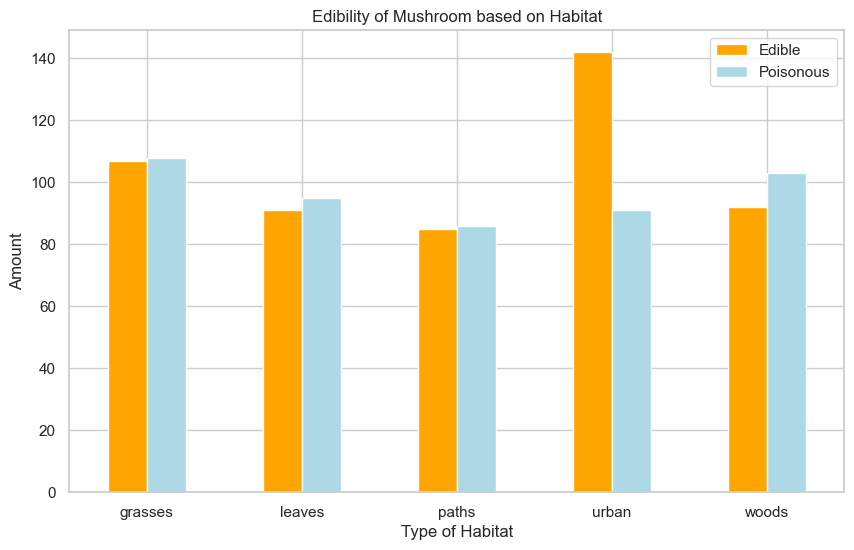

In [70]:
# Compring 'habitat' with 'Edibility' columns

pd.crosstab(df['Habitat'], df['Edibility']).plot(kind='bar',figsize=(10, 6), color=['orange', 'lightblue'])

plt.title('Edibility of Mushroom based on Habitat') 
plt.xlabel('Type of Habitat')
plt.ylabel("Amount")
plt.legend(labels=['Edible', 'Poisonous'])
plt.xticks(rotation=0)

### Distribution of Edible Mushrooms based on Habitat

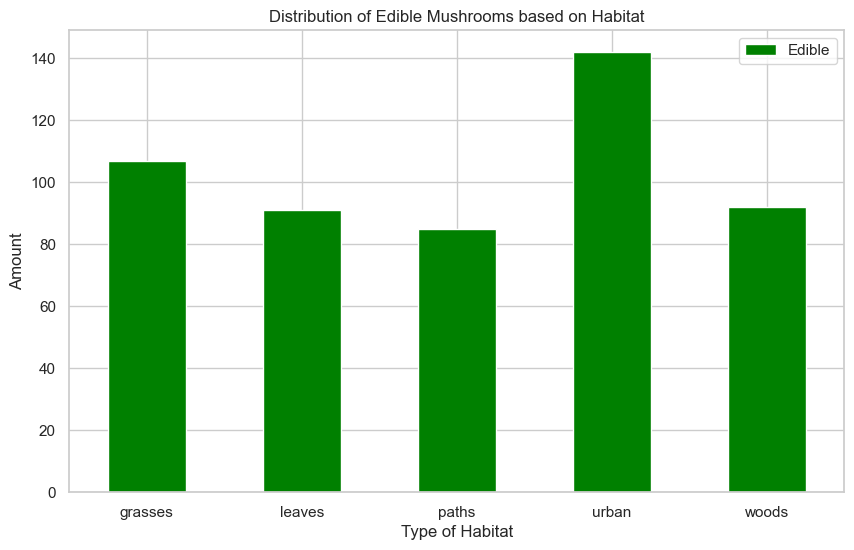

In [71]:
# Filter the dataset for edible mushrooms
edible_df = df[df['Edibility'] == 'edible']

# Plot the distribution of habitats for edible mushrooms
pd.crosstab(edible_df['Habitat'], edible_df['Edibility']).plot(kind='bar', figsize=(10, 6), color=['green'])

plt.title('Distribution of Edible Mushrooms based on Habitat') 
plt.xlabel('Type of Habitat')
plt.ylabel('Amount')
plt.legend(labels=['Edible'])
plt.xticks(rotation=0)

plt.show()

In [72]:
cat_columns = ['Population','Bruising','Cap Shape',
               'Cap Color','Gill Size', 'Stalk Shape',
               'Spore Print Color','Ring Type',
               'Stalk Surface Above Ring', 'Stalk Surface Below Ring',
               'Stalk Color Above Ring','Stalk Color Below Ring',
               'Veil Type', 'Veil Color']

# Create a dictionary to store unique values for each categorical column
unique_values_dict = {}

# Iterate over each categorical column
for col in cat_columns:
    # Get unique values for the current column
    unique_values = df[col].unique()
    
    # Store the unique values in the dictionary
    unique_values_dict[col] = unique_values

# Display the dictionary
# print(unique_values_dict)

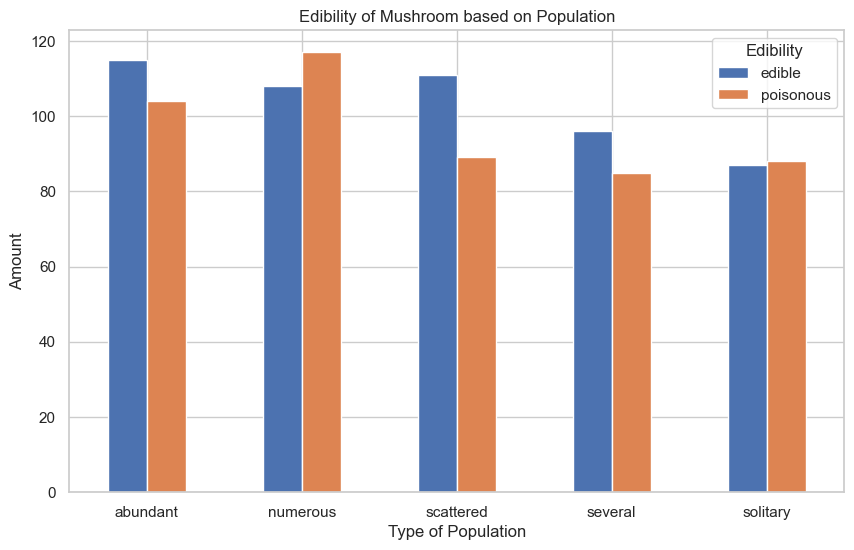

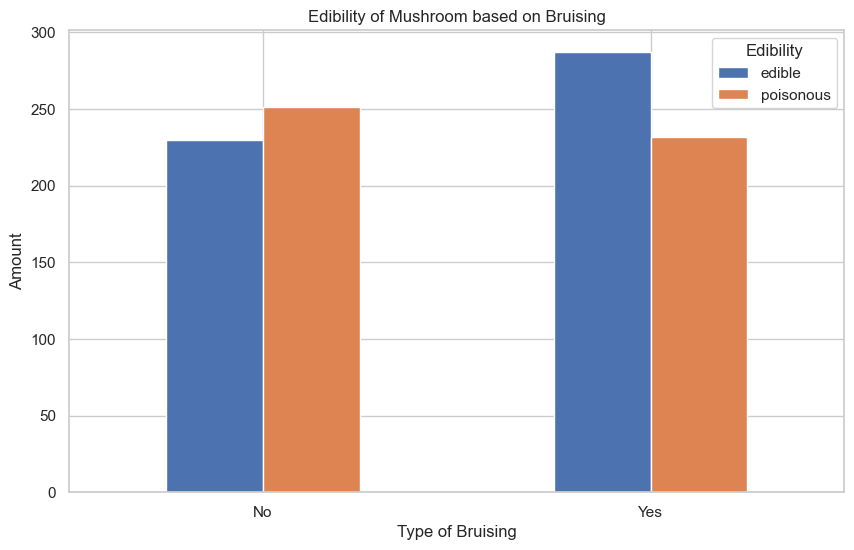

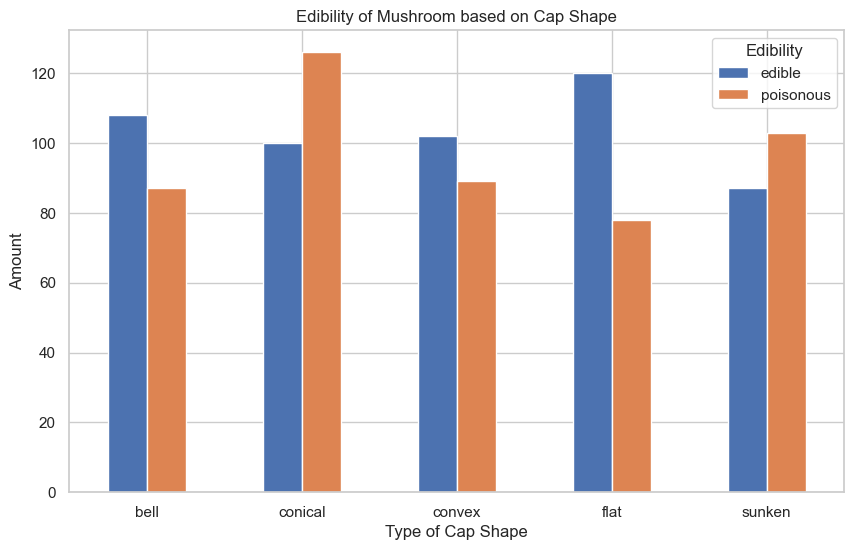

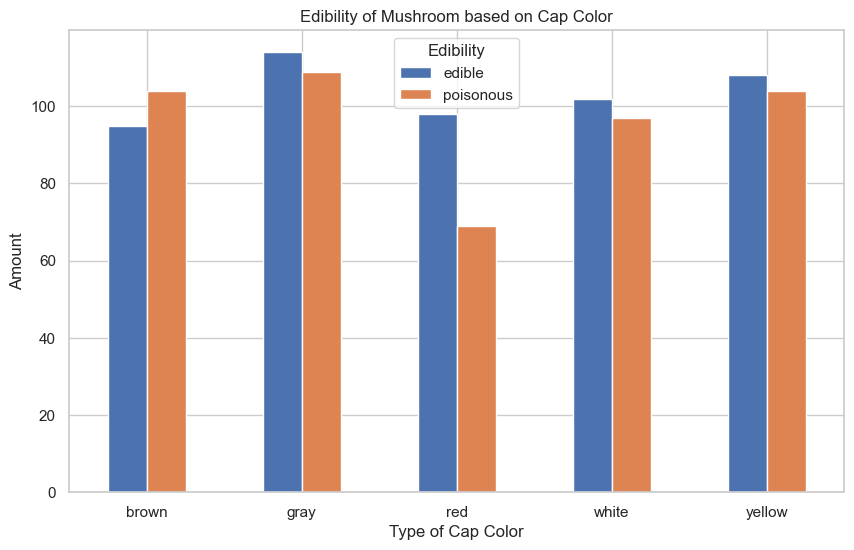

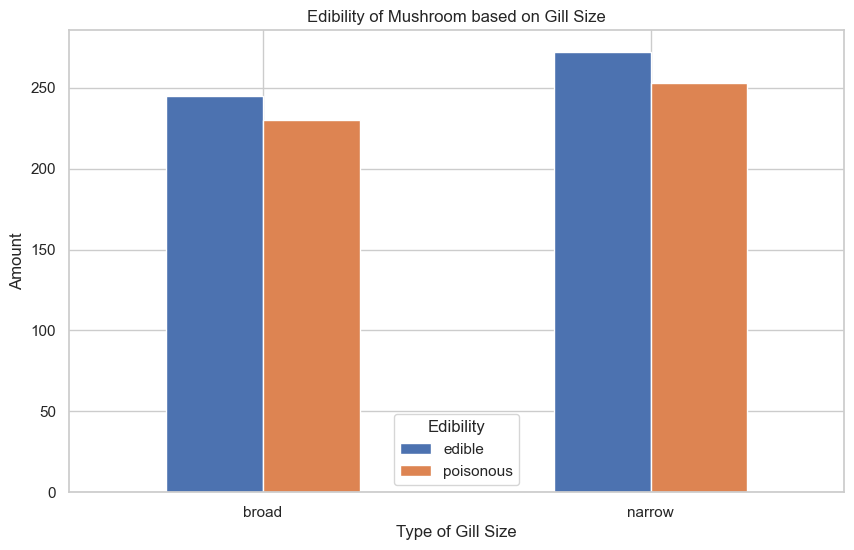

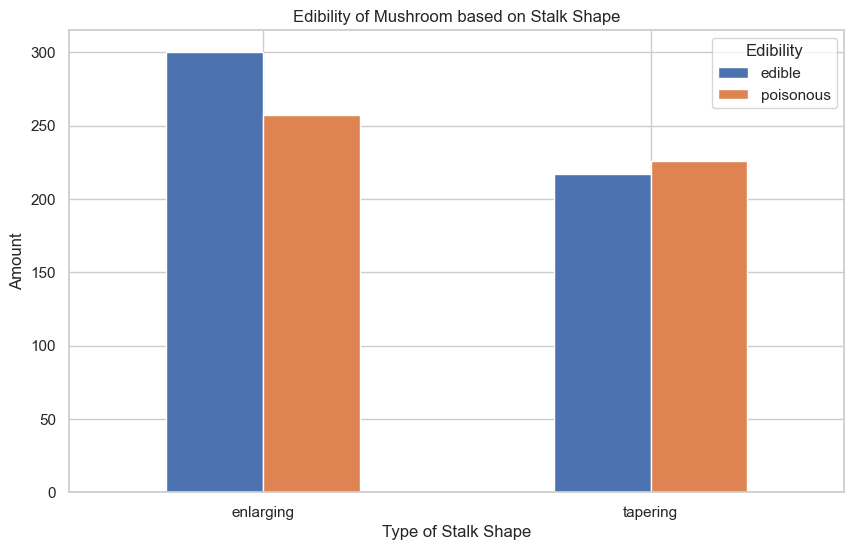

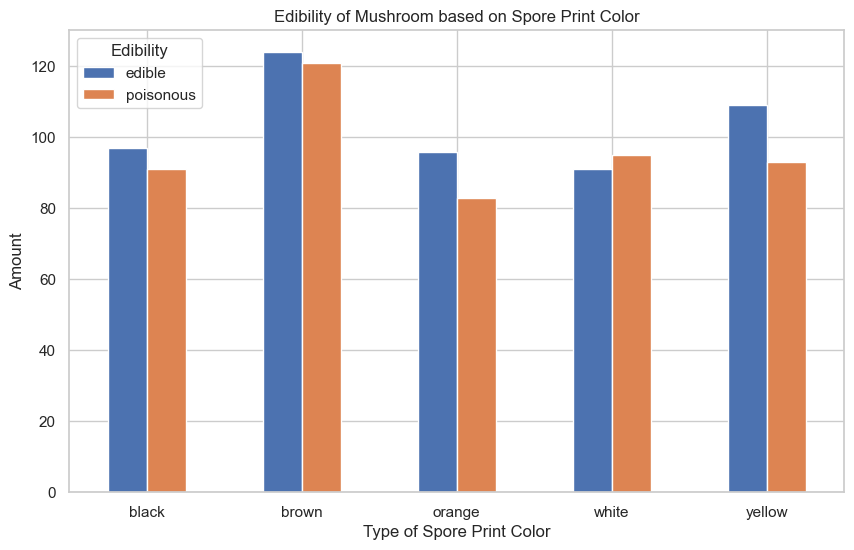

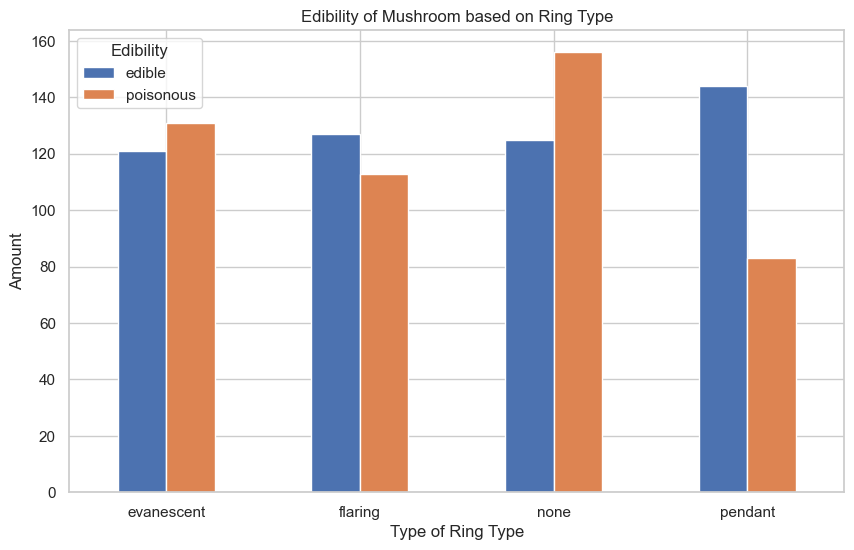

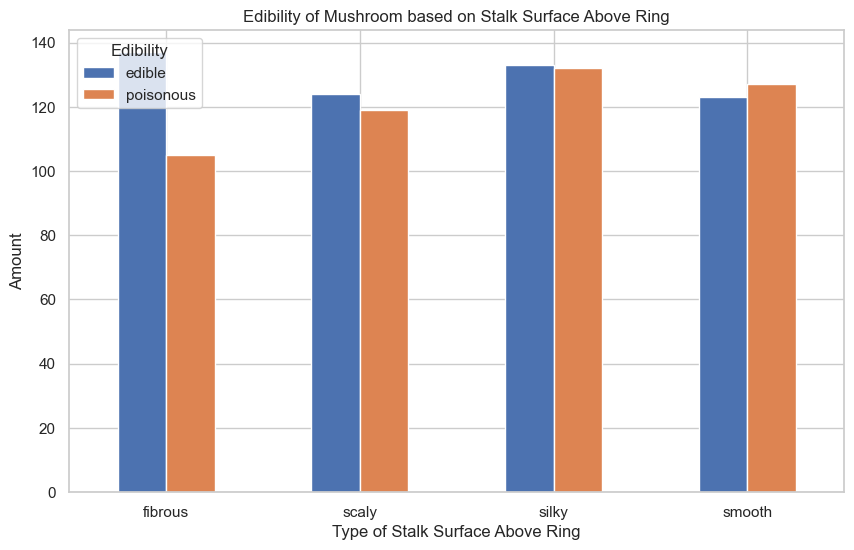

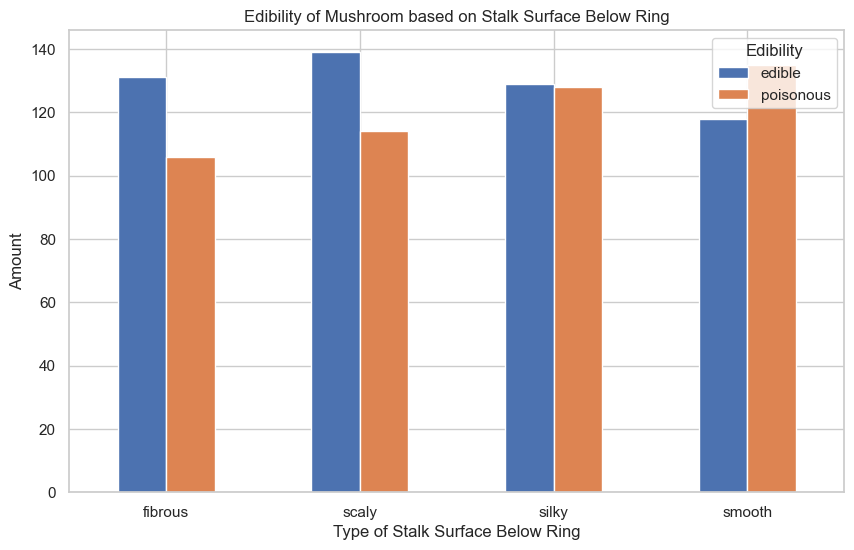

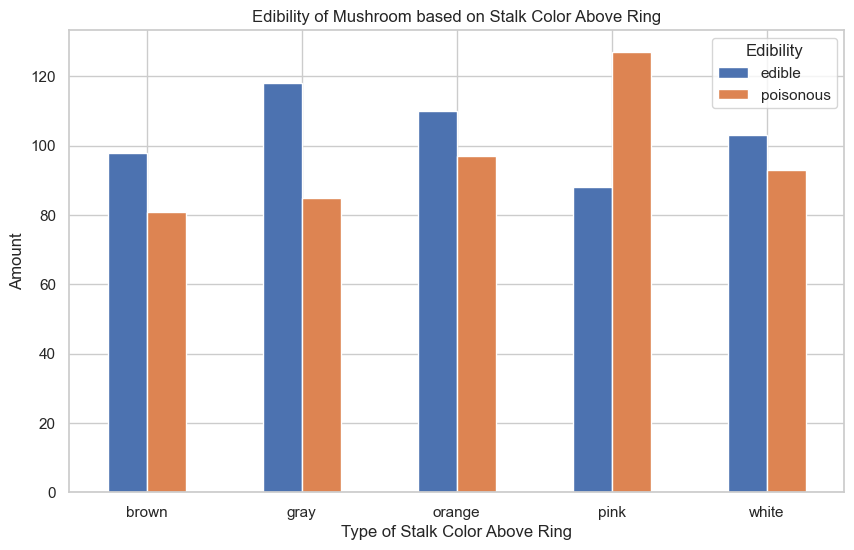

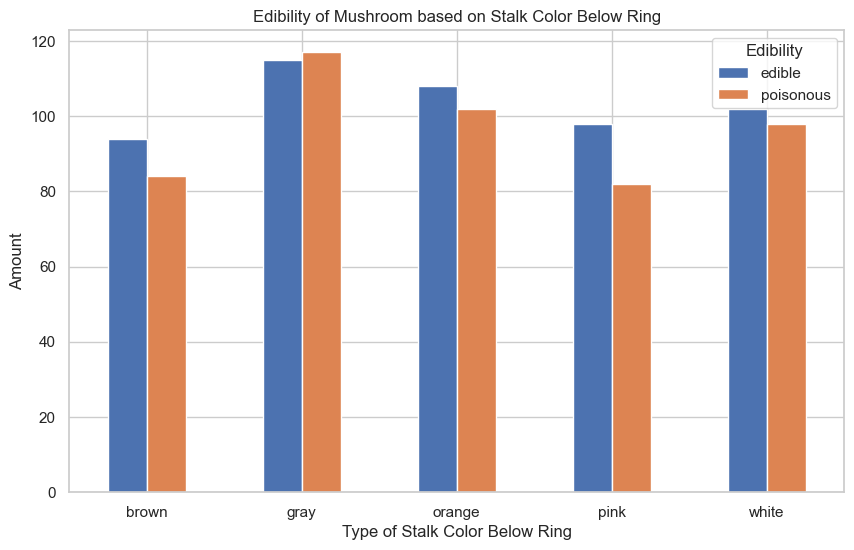

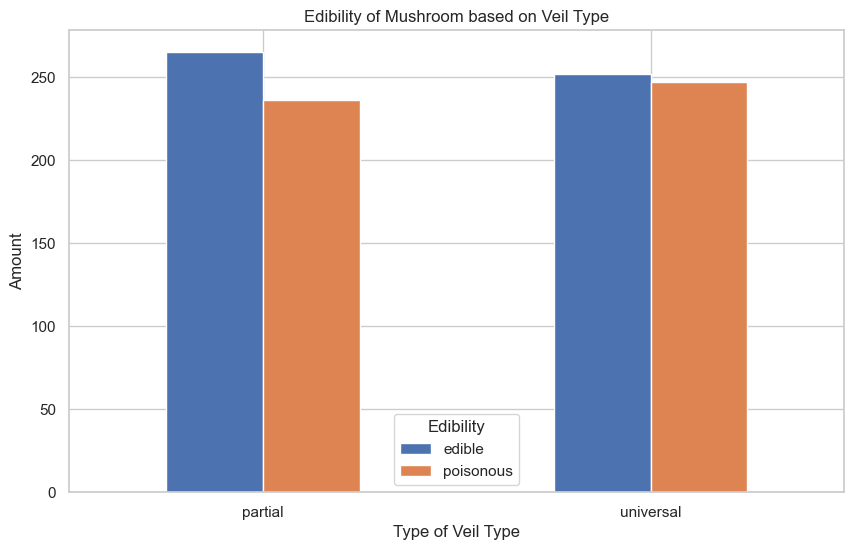

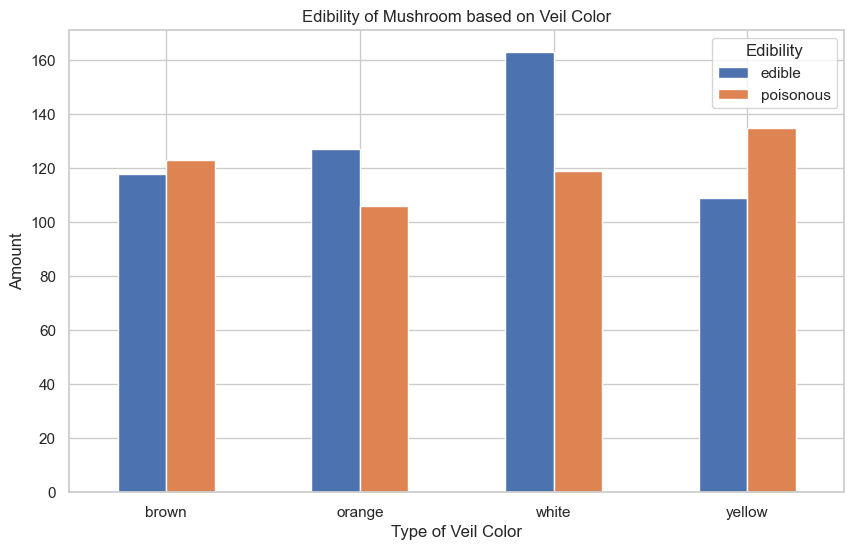

<Figure size 640x480 with 0 Axes>

In [73]:
def plot_with_label(column_name):
    pd.crosstab(df[column_name], df['Edibility']).plot(kind='bar', figsize=(10, 6))
    
    plt.title(f'Edibility of Mushroom based on {column_name}') 
    plt.xlabel(f'Type of {column_name}')
    plt.ylabel('Amount')
    lst_categories = [str(i) for i in unique_values_dict[column_name]]
    plt.xticks(rotation=0)

# Iterating over each categorical column
for column_name in unique_values_dict.keys():
    plot_with_label(column_name)
    plt.show()  # Showing each plot separately
    
plt.tight_layout()
plt.show()  # Show all plots together

# Market Demand Analysis

In [74]:
# Descriptive Statistics
mean_demand = df['Market Demand'].mean()
median_demand = df['Market Demand'].median()
mode_demand = df['Market Demand'].mode().iloc[0]

print(f"Mean Demand: {mean_demand}")
print(f"Median Demand: {median_demand}")
print(f"Mode Demand: {mode_demand}")

Mean Demand: 5.347
Median Demand: 5.0
Mode Demand: 3


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mushroom ID               1000 non-null   int64         
 1   Cap Shape                 1000 non-null   object        
 2   Cap Color                 1000 non-null   object        
 3   Gill Size                 1000 non-null   object        
 4   Stalk Shape               1000 non-null   object        
 5   Habitat                   1000 non-null   object        
 6   Edibility                 1000 non-null   object        
 7   Market Demand             1000 non-null   Int64         
 8   Spore Print Color         1000 non-null   object        
 9   Population                1000 non-null   object        
 10  Odor                      1000 non-null   object        
 11  Bruising                  1000 non-null   object        
 12  Ring Type            

In [76]:
# Check the dtype of the column
print(df['Market Demand'].dtype)

# Convert to int64 if needed
df['Market Demand'] = df['Market Demand'].astype('int64')


Int64


### Comparing Odor Distributions

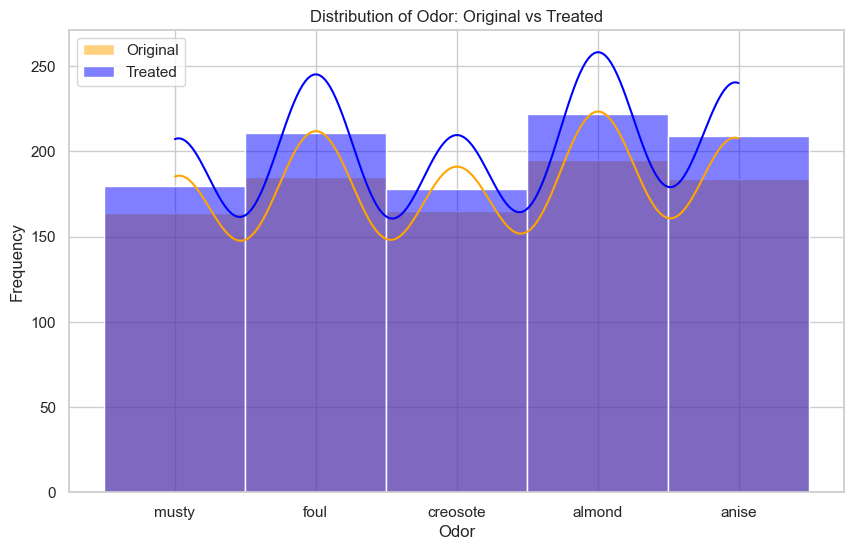

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df_mus_treated['Odor'], kde=True, label='Original', color = 'orange')
sns.histplot(df['Odor'], kde=True, label='Treated', color = 'blue')
plt.title('Distribution of Odor: Original vs Treated')
plt.xlabel('Odor')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Comparing Market Demand Distributions

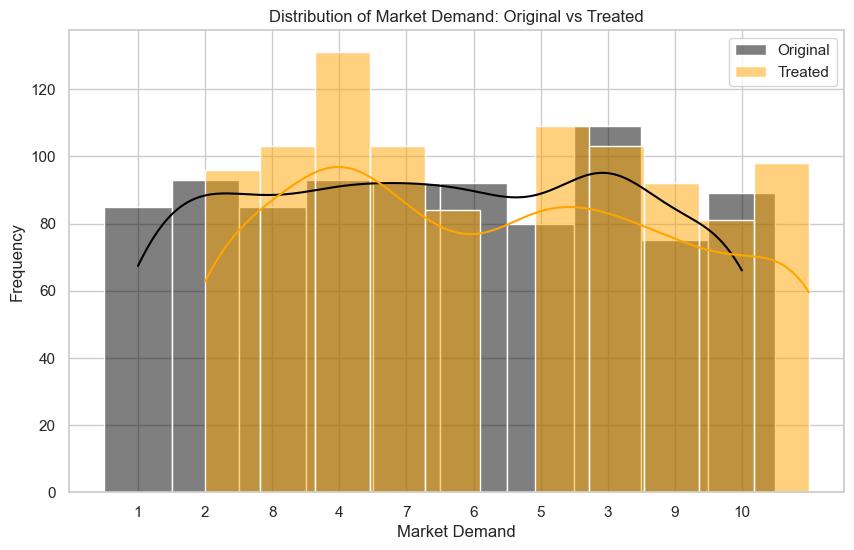

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df_mus_treated['Market Demand'], kde=True, label='Original', color='black')
sns.histplot(df['Market Demand'], kde=True, label='Treated', color = 'orange')
plt.title('Distribution of Market Demand: Original vs Treated')
plt.xlabel('Market Demand')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Comparing Edibility distributions

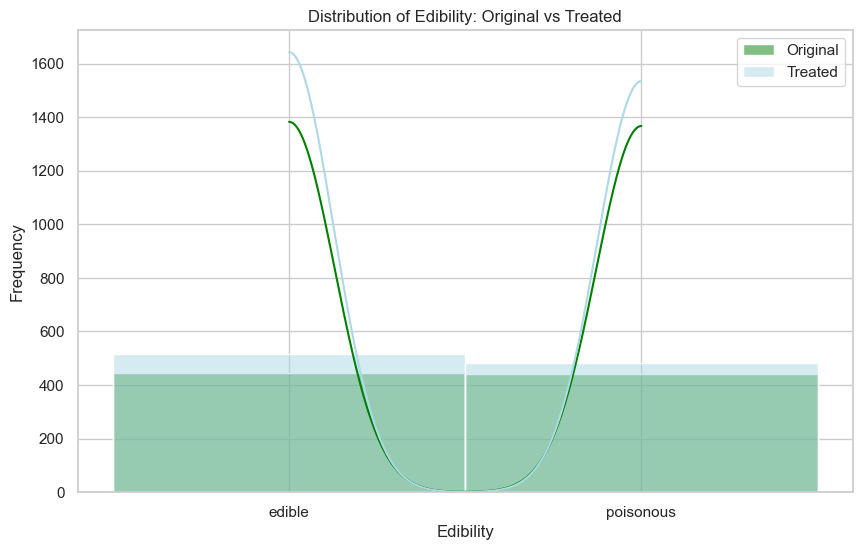

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df_mus_treated['Edibility'], kde=True, label='Original', color = 'green')
sns.histplot(df['Edibility'], kde=True, label='Treated', color = 'lightblue')
plt.title('Distribution of Edibility: Original vs Treated')
plt.xlabel('Edibility')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Analysing Z-test with two-sample Kolmogorov-Smirnov test

In [80]:
import scipy.stats as stats

# Extracting data for Edibility
data_original_edibility = df_mus_treated['Edibility'].dropna()
data_treated_edibility = df['Edibility']

# Extracting data for Odor
data_original_odor = df_mus_treated['Odor'].dropna()
data_treated_odor = df['Odor']

# Extracting data for Market Demand
data_original_market_demand = df_mus_treated['Market Demand'].dropna().astype(int)
data_treated_market_demand = df['Market Demand']

# Perform two-sample Kolmogorov-Smirnov test for Edibility
ks_stat_edibility, p_value_edibility = stats.ks_2samp(data_original_edibility, data_treated_edibility)

# Perform two-sample Kolmogorov-Smirnov test for Odor
ks_stat_odor, p_value_odor = stats.ks_2samp(data_original_odor, data_treated_odor)

# Perform two-sample Kolmogorov-Smirnov test for Market Demand
ks_stat_market_demand, p_value_market_demand = stats.ks_2samp(data_original_market_demand, data_treated_market_demand)

# Create a list of tuples containing the KS-statistic and p-value for each variable
ks_tests = [
    ('Edibility', ks_stat_edibility, p_value_edibility),
    ('Odor', ks_stat_odor, p_value_odor),
    ('Market Demand', ks_stat_market_demand, p_value_market_demand)
]

# Create a DataFrame from the list of tuples
ks_df = pd.DataFrame(ks_tests, columns=['Variable', 'KS-statistic', 'p-value'])

# Display the DataFrame
ks_df


,Variable,KS-statistic,p-value
0,Edibility,0.014182,0.999962
1,Odor,0.006588,1.000000
2,Market Demand,0.008611,1.000000


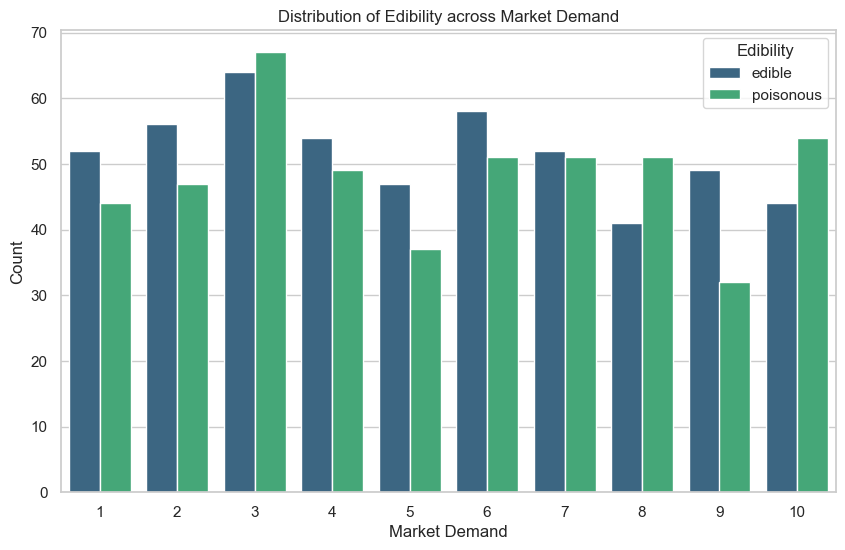

In [81]:
# setting the style
sns.set(style="whitegrid")

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Market Demand', hue='Edibility', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Market Demand')
plt.ylabel('Count')
plt.title('Distribution of Edibility across Market Demand')

# Show the plot
plt.show()

## Odor and Market Demand

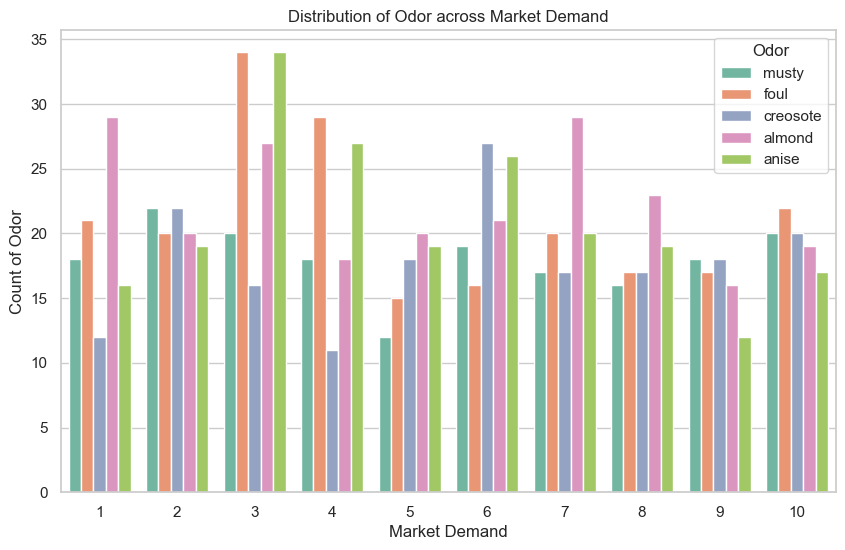

In [82]:
custom_palette = sns.color_palette("Set2")

# Grouped bar plot for Odor and Market Demand
plt.figure(figsize=(10, 6))
sns.countplot(hue='Odor', x='Market Demand', data=df, palette=custom_palette)
plt.xlabel('Market Demand')
plt.ylabel('Count of Odor')
plt.title('Distribution of Odor across Market Demand')
plt.show()

## Cap Shape and Market Demand

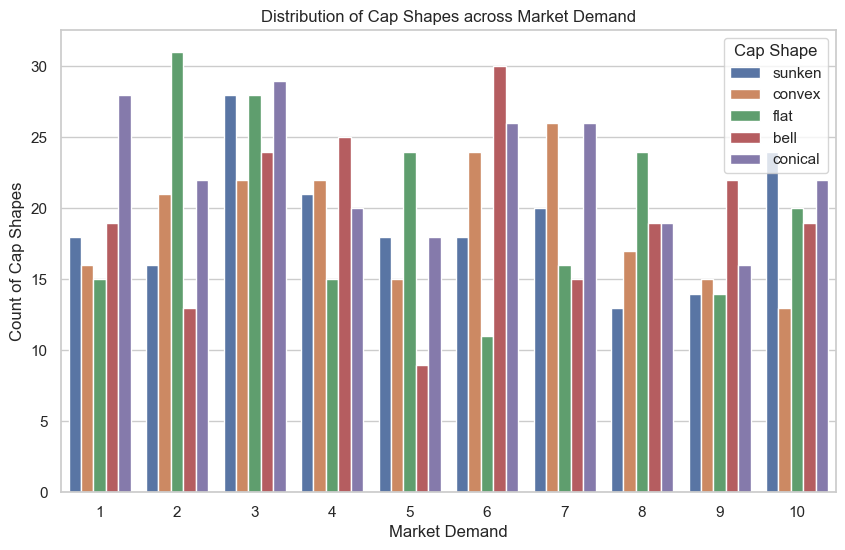

In [83]:
# Grouped bar plot for Cap Shape and Market Demand
plt.figure(figsize=(10, 6))
sns.countplot(hue='Cap Shape', x='Market Demand', data=df)
plt.xlabel('Market Demand')
plt.ylabel('Count of Cap Shapes')
plt.title('Distribution of Cap Shapes across Market Demand')
plt.show()

## Population and Market Demand

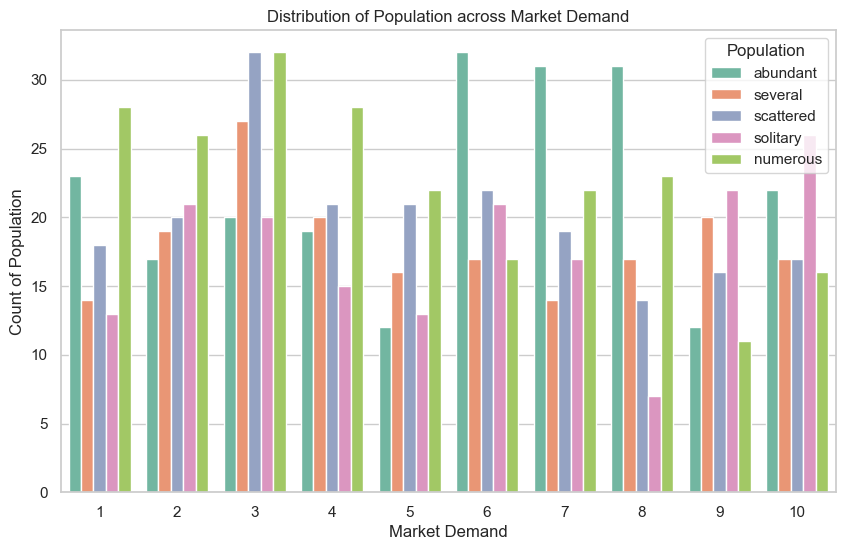

In [84]:
# Grouped bar plot for Population and Market Demand
plt.figure(figsize=(10, 6))
sns.countplot(hue='Population', x='Market Demand', data=df, palette='Set2')
plt.xlabel('Market Demand')
plt.ylabel('Count of Population')
plt.title('Distribution of Population across Market Demand')
plt.show()

## Habitat and Market Demand

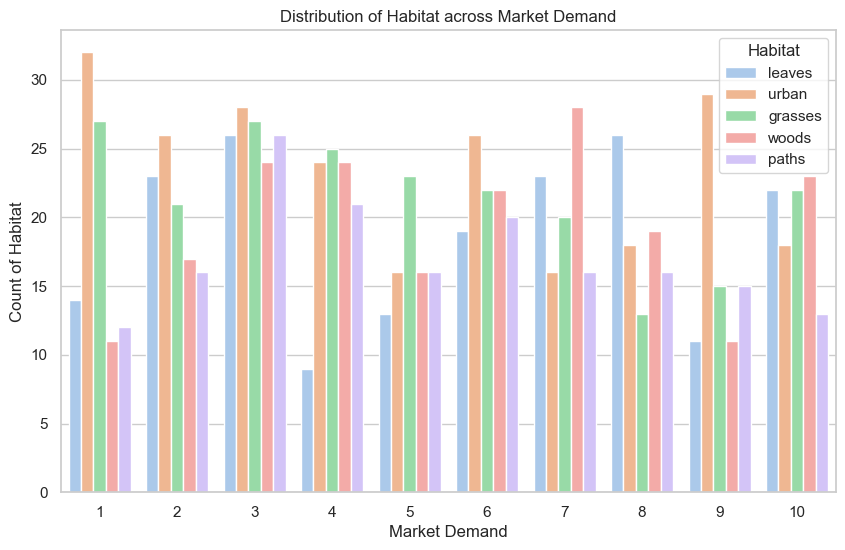

In [85]:
# Grouped bar plot for Habitat and Market Demand
plt.figure(figsize=(10, 6))
sns.countplot(hue='Habitat', x='Market Demand', data=df, palette='pastel')
plt.xlabel('Market Demand')
plt.ylabel('Count of Habitat')
plt.title('Distribution of Habitat across Market Demand')
plt.show()


## Gill Size and Market Demand

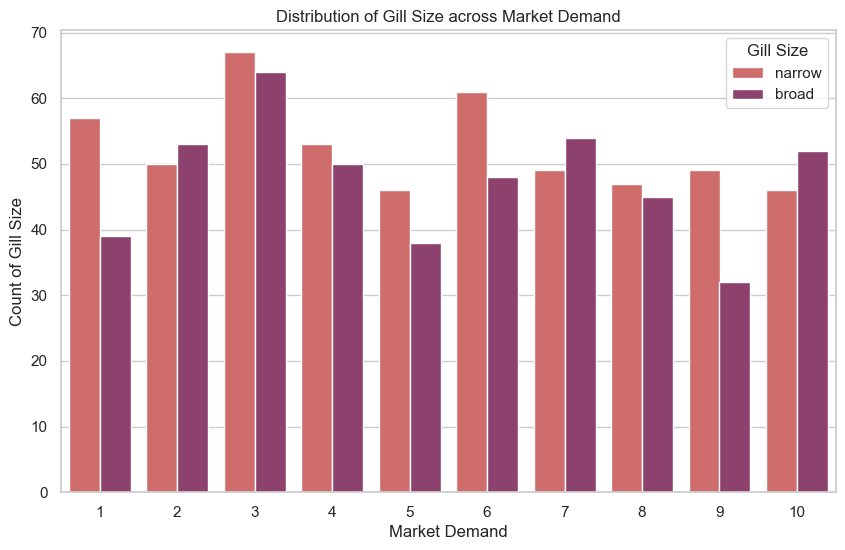

In [86]:
# Grouped bar plot for Gill Size and Market Demand
plt.figure(figsize=(10, 6))
sns.countplot(hue='Gill Size', x='Market Demand', data=df, palette='flare')
plt.xlabel('Market Demand')
plt.ylabel('Count of Gill Size')
plt.title('Distribution of Gill Size across Market Demand')
plt.show()

## Stalk Shape and Market Demand

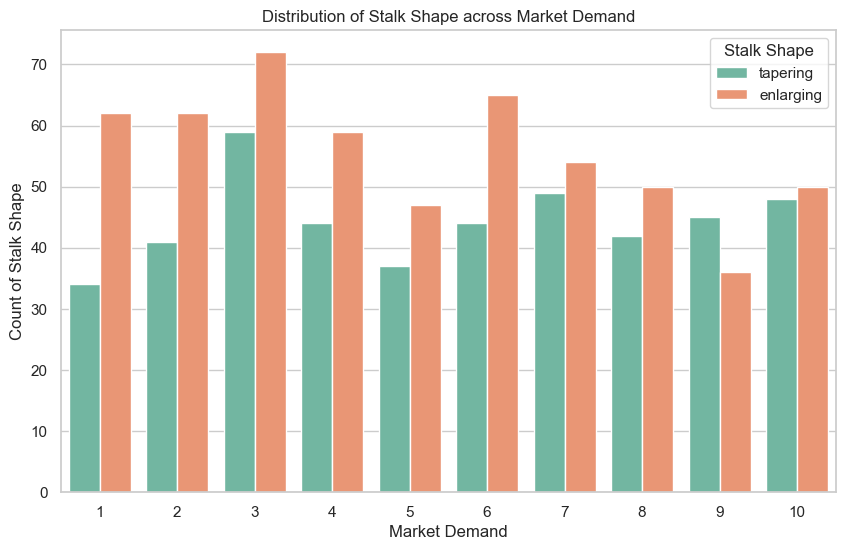

In [87]:
# Grouped bar plot for Stalk Shape and Market Demand
plt.figure(figsize=(10, 6))
sns.countplot(hue='Stalk Shape', x='Market Demand', data=df, palette='Set2')
plt.xlabel('Market Demand')
plt.ylabel('Count of Stalk Shape')
plt.title('Distribution of Stalk Shape across Market Demand')
plt.show()

## Cap Color and Market Demand

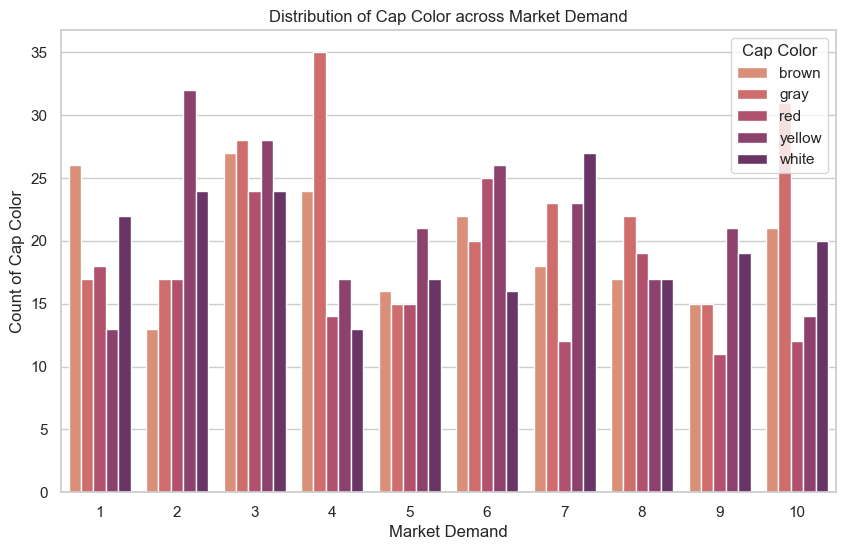

In [88]:
# Grouped bar plot for Cap Color and Market Demand
plt.figure(figsize=(10, 6))
sns.countplot(hue='Cap Color', x='Market Demand', data=df, palette='flare')
plt.xlabel('Market Demand')
plt.ylabel('Count of Cap Color')
plt.title('Distribution of Cap Color across Market Demand')
plt.show()

## Correlation Matrix - numerical columns

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mushroom ID               1000 non-null   int64         
 1   Cap Shape                 1000 non-null   object        
 2   Cap Color                 1000 non-null   object        
 3   Gill Size                 1000 non-null   object        
 4   Stalk Shape               1000 non-null   object        
 5   Habitat                   1000 non-null   object        
 6   Edibility                 1000 non-null   object        
 7   Market Demand             1000 non-null   int64         
 8   Spore Print Color         1000 non-null   object        
 9   Population                1000 non-null   object        
 10  Odor                      1000 non-null   object        
 11  Bruising                  1000 non-null   object        
 12  Ring Type            

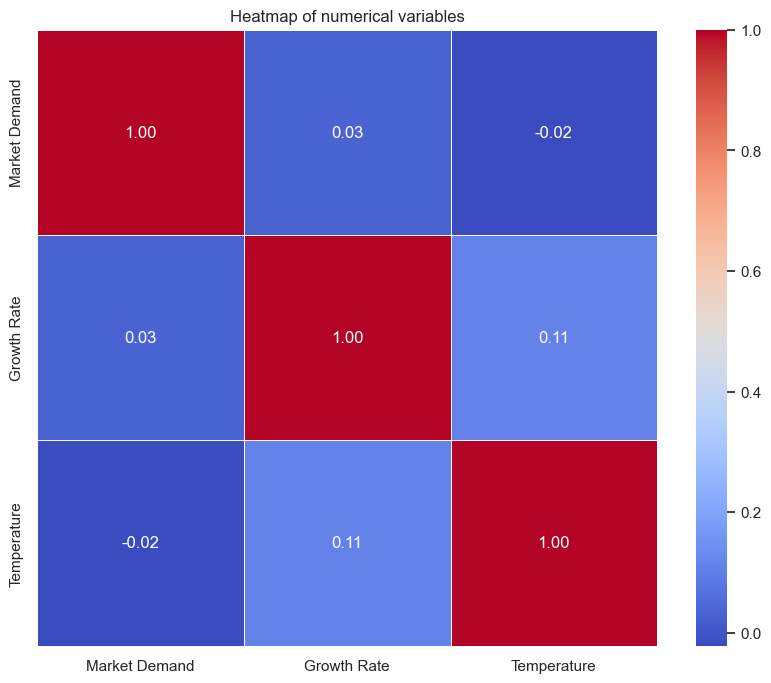

In [122]:

# Selecting specific numerical columns
selected_columns = ['Market Demand', 'Growth Rate', 'Temperature']
numerical_columns = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of numerical variables')
plt.show()

## Correlation Matrix Analysis - categorical columns

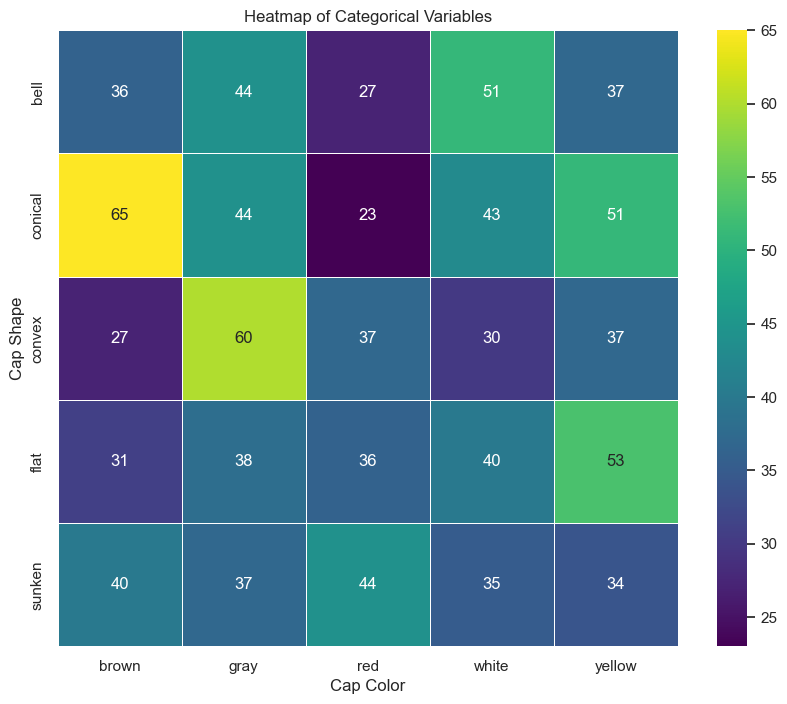

In [90]:
# Selecting categorical columns for analysis
categorical_columns = df.select_dtypes(include='object').columns

# Create a cross-tabulation of categorical variables
cross_tab = pd.crosstab(df[categorical_columns[0]], df[categorical_columns[1]])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt="d", linewidths=.5)
plt.title('Heatmap of Categorical Variables')
plt.show()

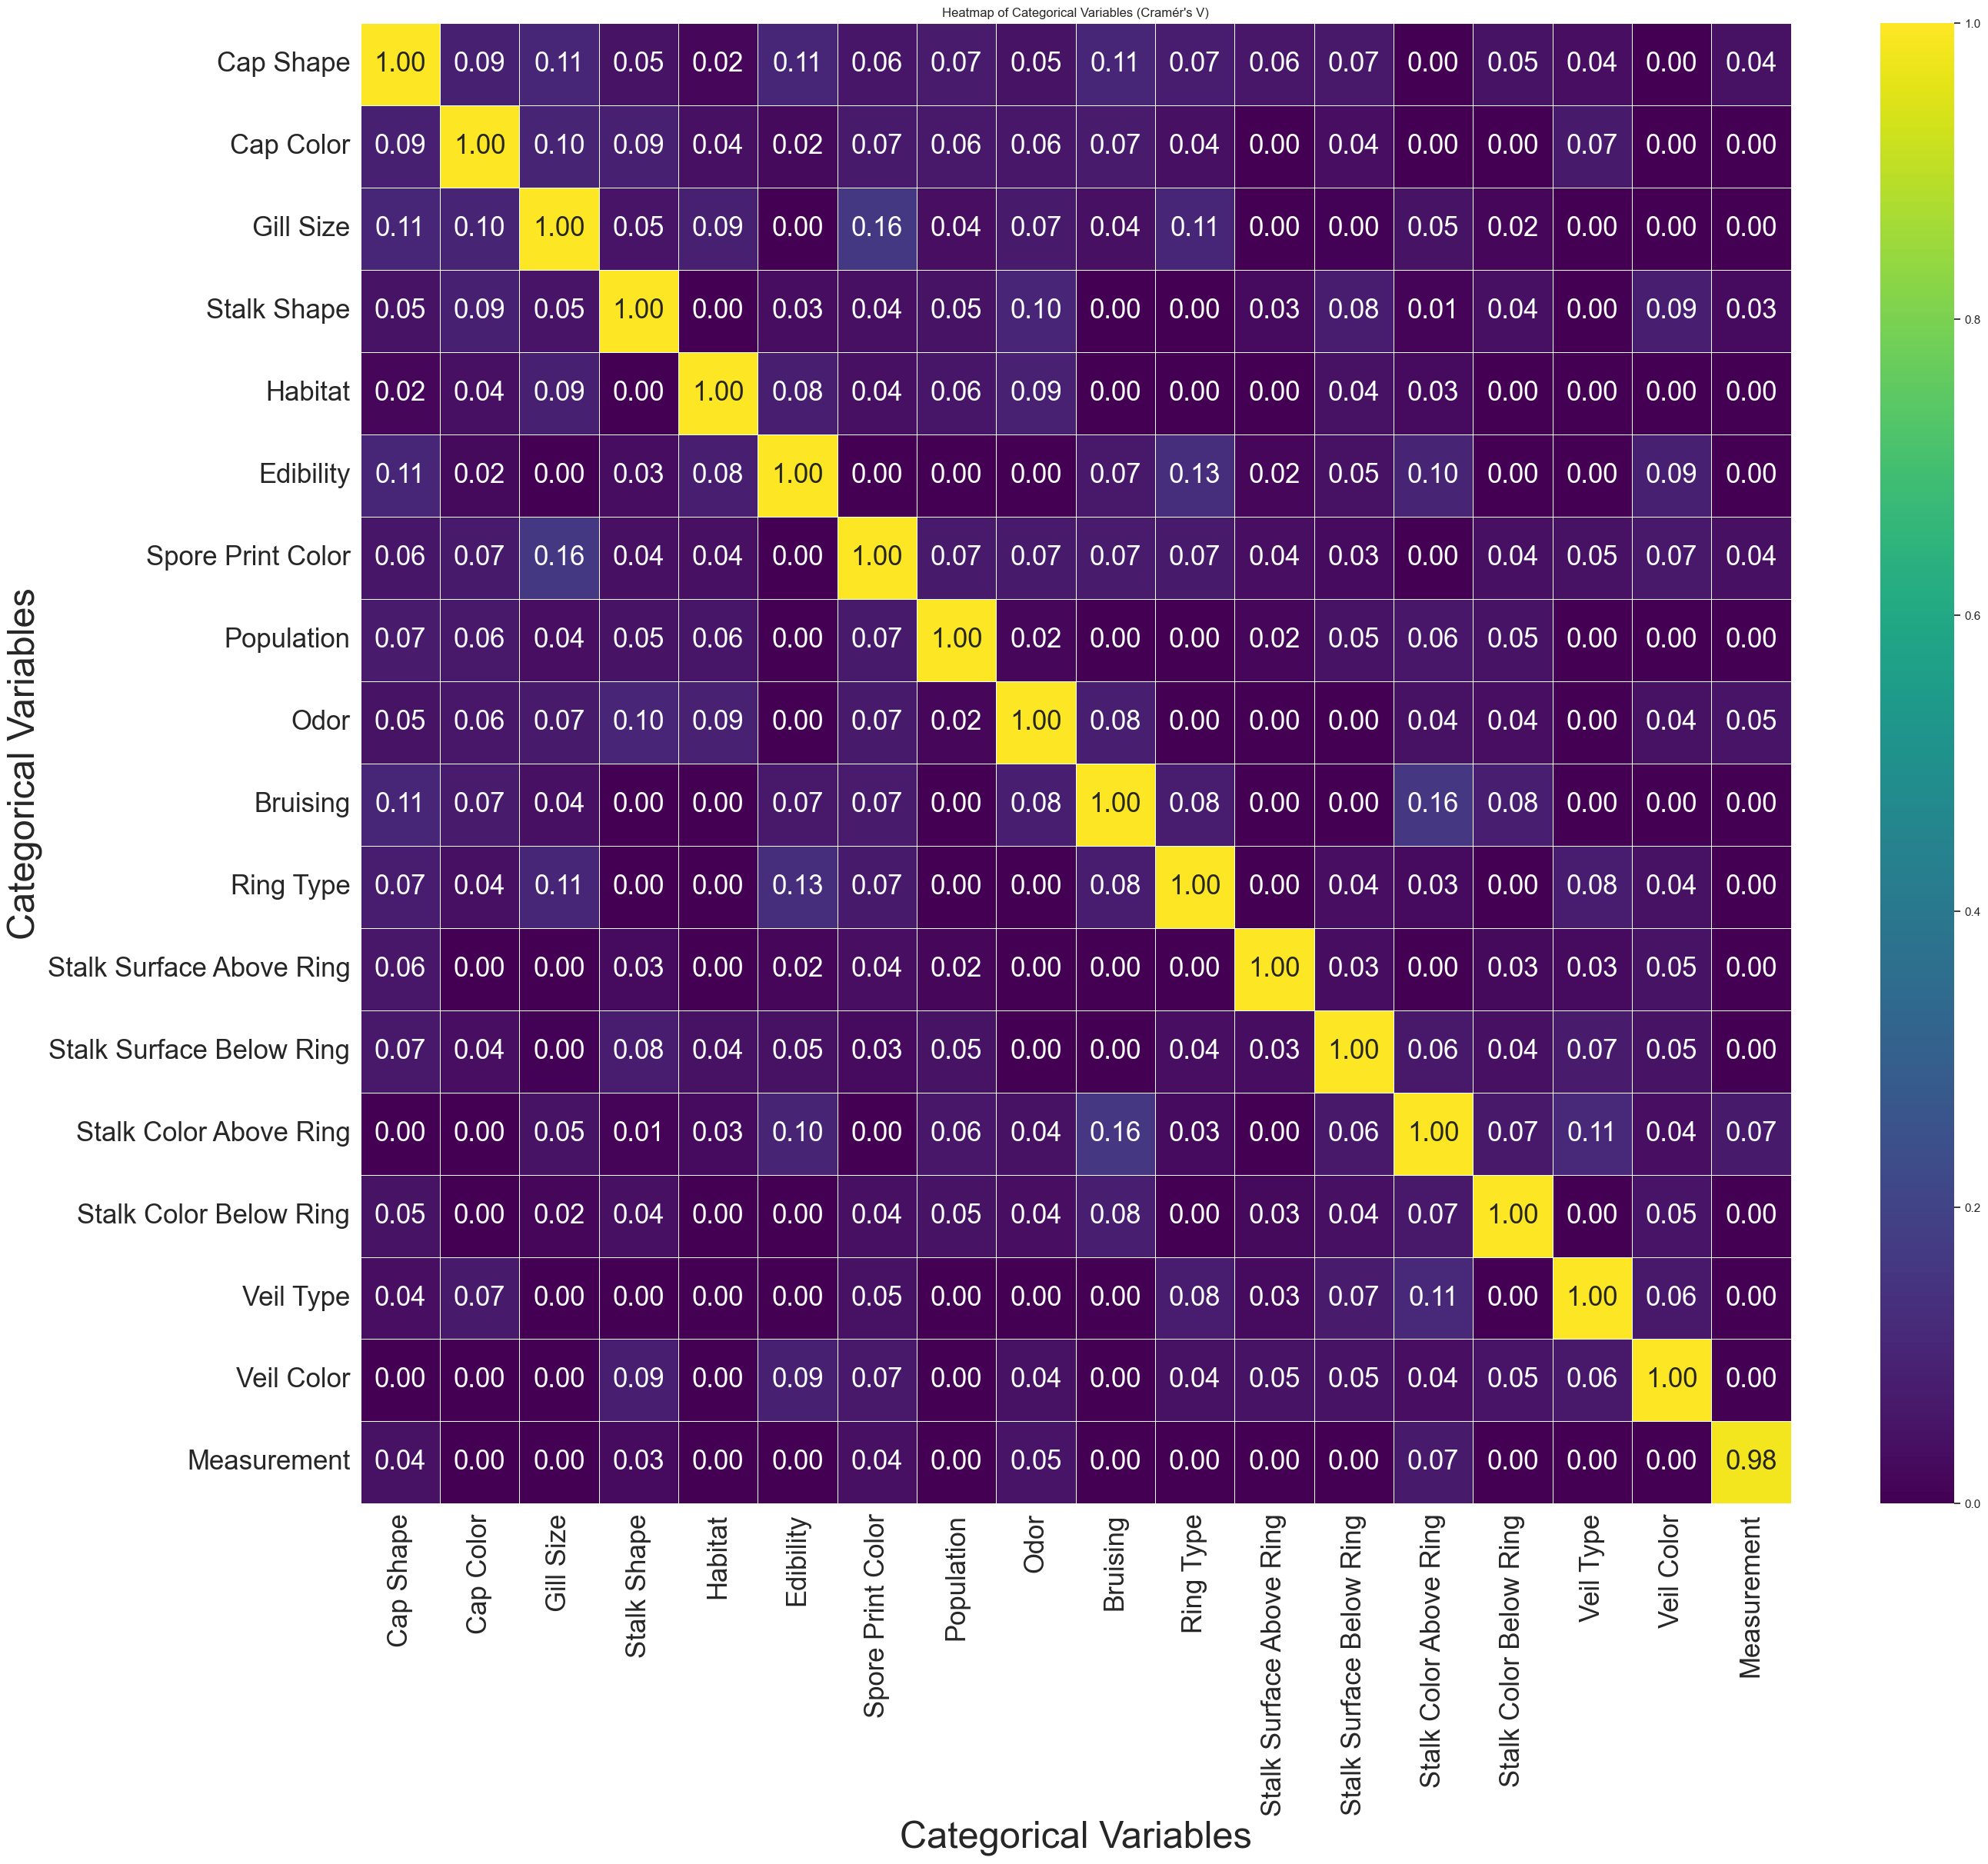

In [94]:
def cramers_v(confusion_matrix):
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Selecting categorical columns for analysis
categorical_columns = df.select_dtypes(include='object').columns

# Create a correlation matrix using Cramér's V
corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        confusion_matrix = pd.crosstab(df[col1], df[col2]).values
        corr = cramers_v(confusion_matrix)
        corr_matrix.loc[col1, col2] = corr

# Create a heatmap
plt.figure(figsize=(30, 25))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, annot_kws={"size": 25})

# Increase fontsize for x-axis and y-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=25)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=25)

plt.title('Heatmap of Categorical Variables (Cramér\'s V)')
plt.xlabel('Categorical Variables', fontsize=35)
plt.ylabel('Categorical Variables', fontsize=35)
plt.show()

## Growth Rate and Temperature Analysis

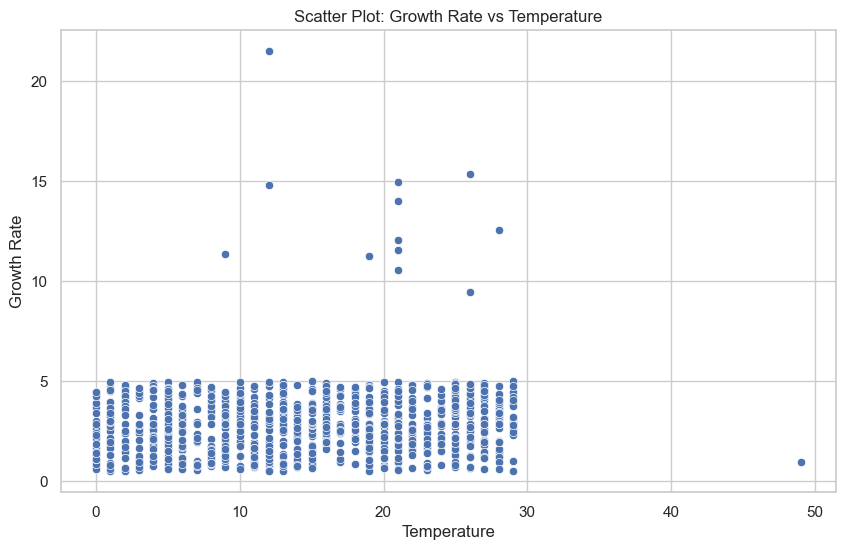

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Growth Rate', data=df)
plt.title('Scatter Plot: Growth Rate vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Growth Rate')
plt.show()

In [96]:
correlation_coefficient = df['Temperature'].corr(df['Growth Rate'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.1070917925134806


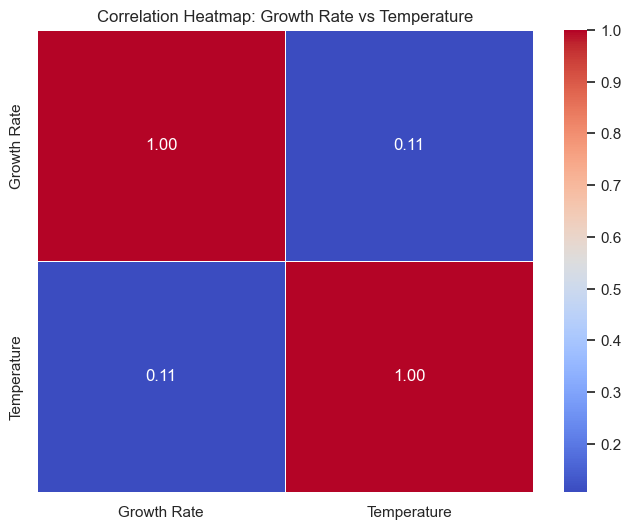

In [115]:
correlation_matrix = df[['Growth Rate', 'Temperature']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap: Growth Rate vs Temperature')
plt.show()

### New features

In [98]:
# assigning variables to the columsn
inspection_column = 'Inspection Date'
incubation_column = 'Incubation date'

# Calculate the time difference between the two columns
df['Time_Difference'] = df[inspection_column] - df[incubation_column]
df


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility,Time_Difference
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.973096,2021-03-07,2021-03-02,49,C,High,-1.115478,3.948983,0,4,0,5 days
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,F,Low,0.000000,-0.191618,1,3,0,1 days
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,No,none,silky,smooth,gray,orange,partial,orange,1.977619,2022-01-08,2022-01-04,10,C,Low,-0.526667,-0.536668,7,4,0,4 days
3,4,sunken,gray,narrow,tapering,grasses,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.272763,2023-02-10,2023-02-02,22,C,Optimal,-0.353666,0.843532,3,2,1,8 days
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,almond,Yes,none,fibrous,fibrous,orange,white,partial,white,0.718874,2023-01-09,2023-01-04,9,C,Low,-1.264494,-0.651684,6,0,0,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,anise,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729,2022-01-07,2022-01-05,25,C,Optimal,0.515591,1.188582,3,1,1,2 days
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,2.876123,2023-05-11,2023-05-03,4,C,Low,0.000000,-1.226768,0,4,0,8 days
997,998,conical,brown,narrow,tapering,urban,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.258391,2023-03-07,2023-03-04,19,C,Optimal,4.913353,0.498482,9,3,0,3 days
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,scaly,pink,orange,universal,brown,4.964074,2023-03-02,2023-03-02,20,C,Optimal,1.223874,0.613499,5,0,0,0 days


In [99]:
# checking how many F in Measurement columns there is

filtered_df = df[df['Measurement'].str.startswith('F', na=False)]
filtered_df

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility,Time_Difference
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,F,Low,0.000000,-0.191618,1,3,0,1 days
85,86,convex,yellow,broad,tapering,urban,edible,5,white,numerous,creosote,Yes,pendant,smooth,smooth,brown,orange,universal,orange,0.824195,2023-03-07,2023-03-01,20,F,Optimal,-1.202758,0.613499,4,2,0,6 days
86,87,flat,gray,broad,enlarging,urban,poisonous,8,white,scattered,almond,No,none,silky,smooth,brown,brown,universal,brown,2.646281,2023-03-07,2023-03-05,1,F,Low,-0.134724,-1.571818,7,0,1,2 days
87,88,conical,yellow,narrow,tapering,leaves,poisonous,8,orange,several,foul,Yes,evanescent,smooth,scaly,white,orange,universal,brown,1.892435,2023-02-09,2023-02-05,12,F,Low,-0.576599,-0.306634,7,3,1,4 days
88,89,conical,red,narrow,enlarging,urban,poisonous,1,orange,abundant,foul,No,flaring,fibrous,scaly,pink,white,universal,yellow,4.207151,2023-04-13,2023-04-05,0,F,Low,0.780196,-1.686835,0,3,1,8 days
89,90,bell,white,narrow,enlarging,leaves,edible,10,brown,abundant,foul,No,none,silky,scaly,brown,orange,universal,yellow,4.959421,2023-05-10,2023-05-03,15,F,Optimal,1.221147,0.038416,9,3,0,7 days
90,91,sunken,gray,narrow,enlarging,grasses,poisonous,3,black,scattered,creosote,Yes,pendant,scaly,scaly,white,brown,universal,yellow,2.876123,2022-05-07,2022-05-02,23,F,Optimal,0.000000,0.958549,2,2,1,5 days
91,92,convex,red,broad,tapering,grasses,poisonous,3,black,scattered,anise,No,none,fibrous,smooth,pink,gray,universal,brown,2.699626,2023-04-04,2023-04-03,17,F,Optimal,-0.103455,0.268449,2,1,1,1 days
92,93,flat,gray,broad,tapering,paths,edible,3,brown,numerous,foul,Yes,pendant,fibrous,scaly,orange,white,universal,white,4.798603,2023-03-02,2023-03-01,6,F,Low,1.126882,-0.996735,2,3,0,1 days
93,94,convex,white,broad,tapering,urban,poisonous,2,yellow,numerous,creosote,Yes,flaring,smooth,silky,white,gray,partial,brown,1.447322,2023-01-09,2023-01-02,2,F,Low,-0.837506,-1.456801,1,2,1,7 days


In [100]:
# Creating a mask to filter temperature
mask = (df['Temperature'] >= 13) & (df['Temperature'] <= 28)

# Replacing 'F' with 'C' in the 'Measurement' column where the condition is True
df.loc[mask, 'Measurement'] = 'C'

# Printing the updated DataFrame
filtered_df = df[df['Measurement'].str.startswith('F', na=False)]
filtered_df


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility,Time_Difference
86,87,flat,gray,broad,enlarging,urban,poisonous,8,white,scattered,almond,No,none,silky,smooth,brown,brown,universal,brown,2.646281,2023-03-07,2023-03-05,1,F,Low,-0.134724,-1.571818,7,0,1,2 days
87,88,conical,yellow,narrow,tapering,leaves,poisonous,8,orange,several,foul,Yes,evanescent,smooth,scaly,white,orange,universal,brown,1.892435,2023-02-09,2023-02-05,12,F,Low,-0.576599,-0.306634,7,3,1,4 days
88,89,conical,red,narrow,enlarging,urban,poisonous,1,orange,abundant,foul,No,flaring,fibrous,scaly,pink,white,universal,yellow,4.207151,2023-04-13,2023-04-05,0,F,Low,0.780196,-1.686835,0,3,1,8 days
92,93,flat,gray,broad,tapering,paths,edible,3,brown,numerous,foul,Yes,pendant,fibrous,scaly,orange,white,universal,white,4.798603,2023-03-02,2023-03-01,6,F,Low,1.126882,-0.996735,2,3,0,1 days
93,94,convex,white,broad,tapering,urban,poisonous,2,yellow,numerous,creosote,Yes,flaring,smooth,silky,white,gray,partial,brown,1.447322,2023-01-09,2023-01-02,2,F,Low,-0.837506,-1.456801,1,2,1,7 days
95,96,bell,yellow,broad,tapering,grasses,poisonous,6,white,abundant,almond,Yes,evanescent,silky,silky,brown,orange,universal,yellow,3.434696,2021-01-04,2021-01-02,1,F,Low,0.327414,-1.571818,5,0,1,2 days
96,97,flat,gray,broad,tapering,leaves,poisonous,3,black,abundant,creosote,No,none,silky,silky,pink,gray,universal,yellow,0.940378,2023-02-08,2023-02-02,12,F,Low,-1.134657,-0.306634,2,2,1,6 days
100,101,flat,red,narrow,tapering,urban,poisonous,3,brown,numerous,anise,No,evanescent,fibrous,smooth,orange,white,partial,yellow,0.922637,2023-01-09,2023-01-04,11,F,Low,-1.145055,-0.421651,2,1,1,5 days
101,102,flat,gray,narrow,tapering,woods,poisonous,4,brown,scattered,anise,No,flaring,scaly,smooth,white,gray,partial,white,4.645426,2023-01-05,2023-01-04,2,F,Low,1.037096,-1.456801,3,1,1,1 days
105,106,convex,brown,narrow,tapering,paths,poisonous,10,brown,scattered,almond,Yes,pendant,scaly,smooth,orange,white,universal,brown,3.388634,2023-05-01,2023-05-01,11,F,Low,0.300414,-0.421651,9,0,1,0 days


Assuming the category Measurement has invalid F entries due to the optimal temperature for Mushoorms, I replaced the F for C while maintaining the values in the Temperature variable

In [101]:
df['Measurement'] = df['Measurement'].replace('F', 'C')
df

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility,Time_Difference
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.973096,2021-03-07,2021-03-02,49,C,High,-1.115478,3.948983,0,4,0,5 days
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,C,Low,0.000000,-0.191618,1,3,0,1 days
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,No,none,silky,smooth,gray,orange,partial,orange,1.977619,2022-01-08,2022-01-04,10,C,Low,-0.526667,-0.536668,7,4,0,4 days
3,4,sunken,gray,narrow,tapering,grasses,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.272763,2023-02-10,2023-02-02,22,C,Optimal,-0.353666,0.843532,3,2,1,8 days
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,almond,Yes,none,fibrous,fibrous,orange,white,partial,white,0.718874,2023-01-09,2023-01-04,9,C,Low,-1.264494,-0.651684,6,0,0,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,anise,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729,2022-01-07,2022-01-05,25,C,Optimal,0.515591,1.188582,3,1,1,2 days
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,2.876123,2023-05-11,2023-05-03,4,C,Low,0.000000,-1.226768,0,4,0,8 days
997,998,conical,brown,narrow,tapering,urban,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.258391,2023-03-07,2023-03-04,19,C,Optimal,4.913353,0.498482,9,3,0,3 days
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,scaly,pink,orange,universal,brown,4.964074,2023-03-02,2023-03-02,20,C,Optimal,1.223874,0.613499,5,0,0,0 days


### Extracting days from column Time Difference and renaming the column

In [102]:
# Convert 'Time_Difference' to string and extract numeric part
df['Time_Difference'] = df['Time_Difference'].astype(str).str.extract('(\d+)').astype(int)

# Rename the column
df.rename(columns={'Time_Difference': 'Time_Difference (in days)'}, inplace=True)
df


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility,Time_Difference (in days)
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.973096,2021-03-07,2021-03-02,49,C,High,-1.115478,3.948983,0,4,0,5
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,C,Low,0.000000,-0.191618,1,3,0,1
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,No,none,silky,smooth,gray,orange,partial,orange,1.977619,2022-01-08,2022-01-04,10,C,Low,-0.526667,-0.536668,7,4,0,4
3,4,sunken,gray,narrow,tapering,grasses,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.272763,2023-02-10,2023-02-02,22,C,Optimal,-0.353666,0.843532,3,2,1,8
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,almond,Yes,none,fibrous,fibrous,orange,white,partial,white,0.718874,2023-01-09,2023-01-04,9,C,Low,-1.264494,-0.651684,6,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,anise,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729,2022-01-07,2022-01-05,25,C,Optimal,0.515591,1.188582,3,1,1,2
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,2.876123,2023-05-11,2023-05-03,4,C,Low,0.000000,-1.226768,0,4,0,8
997,998,conical,brown,narrow,tapering,urban,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.258391,2023-03-07,2023-03-04,19,C,Optimal,4.913353,0.498482,9,3,0,3
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,scaly,pink,orange,universal,brown,4.964074,2023-03-02,2023-03-02,20,C,Optimal,1.223874,0.613499,5,0,0,0


In [103]:
# Select the columns for analysis
columns_for_analysis = ['Temperature', 'Time_Difference (in days)']

# Create a correlation matrix
corr_matrix = df[columns_for_analysis].corr()
corr_matrix



,Temperature,Time_Difference (in days)
Temperature,1.000000,0.015827
Time_Difference (in days),0.015827,1.000000


### Season of inspection

In [106]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df['Inspection_Season'] = df['Inspection Date'].dt.month.map(seasons)
df


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility,Time_Difference (in days),Inspection_Season
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.973096,2021-03-07,2021-03-02,49,C,High,-1.115478,3.948983,0,4,0,5,Spring
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,C,Low,0.000000,-0.191618,1,3,0,1,Spring
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,No,none,silky,smooth,gray,orange,partial,orange,1.977619,2022-01-08,2022-01-04,10,C,Low,-0.526667,-0.536668,7,4,0,4,Winter
3,4,sunken,gray,narrow,tapering,grasses,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.272763,2023-02-10,2023-02-02,22,C,Optimal,-0.353666,0.843532,3,2,1,8,Winter
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,almond,Yes,none,fibrous,fibrous,orange,white,partial,white,0.718874,2023-01-09,2023-01-04,9,C,Low,-1.264494,-0.651684,6,0,0,5,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,anise,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729,2022-01-07,2022-01-05,25,C,Optimal,0.515591,1.188582,3,1,1,2,Winter
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,2.876123,2023-05-11,2023-05-03,4,C,Low,0.000000,-1.226768,0,4,0,8,Spring
997,998,conical,brown,narrow,tapering,urban,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.258391,2023-03-07,2023-03-04,19,C,Optimal,4.913353,0.498482,9,3,0,3,Spring
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,scaly,pink,orange,universal,brown,4.964074,2023-03-02,2023-03-02,20,C,Optimal,1.223874,0.613499,5,0,0,0,Spring


In [107]:
### Renaming the Time Difference column

df.rename(columns={'Time_Difference (in days)': 'Days_since_Inspection'}, inplace=True)
df


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Category,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility,Days_since_Inspection,Inspection_Season
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.973096,2021-03-07,2021-03-02,49,C,High,-1.115478,3.948983,0,4,0,5,Spring
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,C,Low,0.000000,-0.191618,1,3,0,1,Spring
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,No,none,silky,smooth,gray,orange,partial,orange,1.977619,2022-01-08,2022-01-04,10,C,Low,-0.526667,-0.536668,7,4,0,4,Winter
3,4,sunken,gray,narrow,tapering,grasses,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.272763,2023-02-10,2023-02-02,22,C,Optimal,-0.353666,0.843532,3,2,1,8,Winter
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,almond,Yes,none,fibrous,fibrous,orange,white,partial,white,0.718874,2023-01-09,2023-01-04,9,C,Low,-1.264494,-0.651684,6,0,0,5,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,anise,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729,2022-01-07,2022-01-05,25,C,Optimal,0.515591,1.188582,3,1,1,2,Winter
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,2.876123,2023-05-11,2023-05-03,4,C,Low,0.000000,-1.226768,0,4,0,8,Spring
997,998,conical,brown,narrow,tapering,urban,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.258391,2023-03-07,2023-03-04,19,C,Optimal,4.913353,0.498482,9,3,0,3,Spring
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,scaly,pink,orange,universal,brown,4.964074,2023-03-02,2023-03-02,20,C,Optimal,1.223874,0.613499,5,0,0,0,Spring


In [108]:
### Renaming the Temperature_Category column

df.rename(columns={'Temperature_Category': 'Temperature_Range'}, inplace=True)
df



,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Range,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility,Days_since_Inspection,Inspection_Season
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.973096,2021-03-07,2021-03-02,49,C,High,-1.115478,3.948983,0,4,0,5,Spring
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,C,Low,0.000000,-0.191618,1,3,0,1,Spring
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,No,none,silky,smooth,gray,orange,partial,orange,1.977619,2022-01-08,2022-01-04,10,C,Low,-0.526667,-0.536668,7,4,0,4,Winter
3,4,sunken,gray,narrow,tapering,grasses,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.272763,2023-02-10,2023-02-02,22,C,Optimal,-0.353666,0.843532,3,2,1,8,Winter
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,almond,Yes,none,fibrous,fibrous,orange,white,partial,white,0.718874,2023-01-09,2023-01-04,9,C,Low,-1.264494,-0.651684,6,0,0,5,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,anise,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729,2022-01-07,2022-01-05,25,C,Optimal,0.515591,1.188582,3,1,1,2,Winter
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,2.876123,2023-05-11,2023-05-03,4,C,Low,0.000000,-1.226768,0,4,0,8,Spring
997,998,conical,brown,narrow,tapering,urban,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.258391,2023-03-07,2023-03-04,19,C,Optimal,4.913353,0.498482,9,3,0,3,Spring
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,scaly,pink,orange,universal,brown,4.964074,2023-03-02,2023-03-02,20,C,Optimal,1.223874,0.613499,5,0,0,0,Spring


In [109]:
Days_since_Inspection_mean = df['Days_since_Inspection'].mean()
Days_since_Inspection_mean


4.445

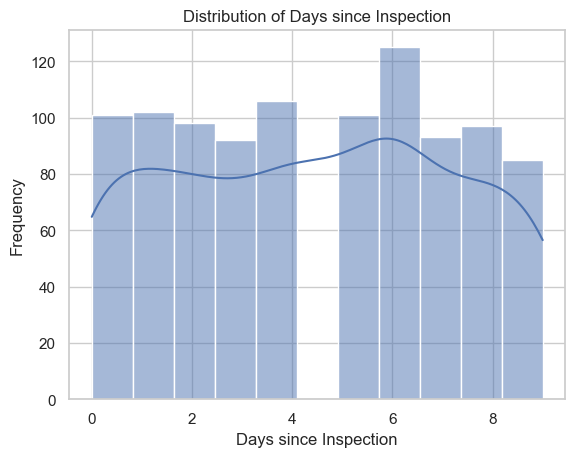

In [110]:
sns.histplot(df['Days_since_Inspection'], kde=True)
plt.title('Distribution of Days since Inspection')
plt.xlabel('Days since Inspection')
plt.ylabel('Frequency')
plt.show()

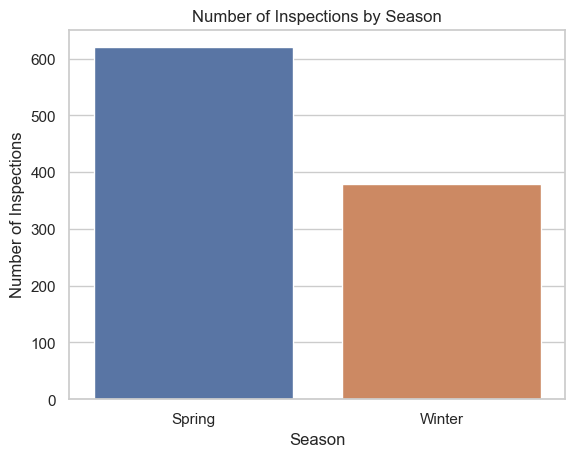

In [111]:
sns.countplot(x='Inspection_Season', data=df)
plt.title('Number of Inspections by Season')
plt.xlabel('Season')
plt.ylabel('Number of Inspections')
plt.show()

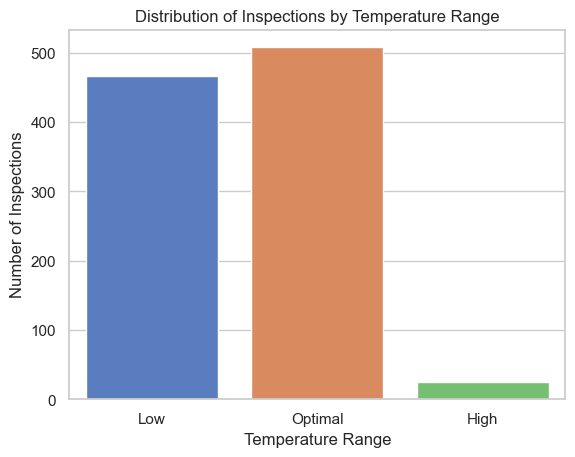

In [112]:
# Define a color palette
temperature_palette = sns.color_palette("muted", 3)

# Plot the distribution of inspections by temperature range
sns.countplot(x='Temperature_Range', data=df, palette=temperature_palette)
plt.title('Distribution of Inspections by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Number of Inspections')
plt.show()


### Encoding

In [113]:
# encoding Market Demand, Edibility and Odor

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode 'Market Demand' and create a new column with a label
df['Encoded_Market Demand'] = label_encoder.fit_transform(df['Market Demand'])

# Encode 'Odor' and create a new column with a label
df['Encoded_Odor'] = label_encoder.fit_transform(df['Odor'])

# Encode 'Edibility' and create a new column with a label
df['Encoded_Edibility'] = label_encoder.fit_transform(df['Edibility'])

df



,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,Bruising,Ring Type,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement,Temperature_Range,Growth Rate_standardized,Temperature_standardized,Encoded_Market Demand,Encoded_Odor,Encoded_Edibility,Days_since_Inspection,Inspection_Season
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,Yes,pendant,scaly,silky,white,brown,universal,orange,0.973096,2021-03-07,2021-03-02,49,C,High,-1.115478,3.948983,0,4,0,5,Spring
1,2,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,Yes,none,silky,scaly,pink,white,universal,white,2.876123,2023-03-05,2023-03-04,13,C,Low,0.000000,-0.191618,1,3,0,1,Spring
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,No,none,silky,smooth,gray,orange,partial,orange,1.977619,2022-01-08,2022-01-04,10,C,Low,-0.526667,-0.536668,7,4,0,4,Winter
3,4,sunken,gray,narrow,tapering,grasses,poisonous,4,orange,scattered,creosote,Yes,evanescent,smooth,scaly,gray,orange,universal,yellow,2.272763,2023-02-10,2023-02-02,22,C,Optimal,-0.353666,0.843532,3,2,1,8,Winter
4,5,flat,red,narrow,enlarging,urban,edible,7,brown,several,almond,Yes,none,fibrous,fibrous,orange,white,partial,white,0.718874,2023-01-09,2023-01-04,9,C,Low,-1.264494,-0.651684,6,0,0,5,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,anise,Yes,evanescent,silky,smooth,white,orange,universal,white,3.755729,2022-01-07,2022-01-05,25,C,Optimal,0.515591,1.188582,3,1,1,2,Winter
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,No,evanescent,fibrous,fibrous,white,brown,partial,brown,2.876123,2023-05-11,2023-05-03,4,C,Low,0.000000,-1.226768,0,4,0,8,Spring
997,998,conical,brown,narrow,tapering,urban,edible,10,brown,scattered,foul,Yes,evanescent,fibrous,silky,gray,orange,partial,yellow,11.258391,2023-03-07,2023-03-04,19,C,Optimal,4.913353,0.498482,9,3,0,3,Spring
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,No,pendant,fibrous,scaly,pink,orange,universal,brown,4.964074,2023-03-02,2023-03-02,20,C,Optimal,1.223874,0.613499,5,0,0,0,Spring
